In [10]:
!pip install mne
!pip install plotly==5.8.2
!pip install pymatreader 
!pip install librosa
!pip install yasa
!pip install protobuf==3.19
!pip install --upgrade pip
!pip uninstall tensorflow
!pip install tensorflow
!pip install seaborn==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.0 MB/s eta 0:00:00MB/s eta 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.18.0
    Uninstalling protobuf-3.18.0:
      Successfully uninstalled protobuf-3.18.0


In [1]:
import pandas as pd
import numpy as np
import os
import time
import glob

from scipy.io import wavfile, savemat
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.fft import fftshift
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

from IPython.display import Audio, display
from IPython.display import clear_output

import librosa
import mne
import pymatreader
import yasa
import seaborn as sns


import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

/home/shivam/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package yasa is out of date. Your version is 0.6.1, the latest is 0.6.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/shivam/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
# CNN packages
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils
from keras import regularizers

2023-03-03 12:39:12.720794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 12:39:12.903855: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-03 12:39:13.624903: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64/stubs:/usr/local/cuda-11.4/lib64::/home/shivam/anaconda3/lib

In [3]:
# Set gpu as backend
import tensorflow as tf
import keras
config = tf.compat.v1.ConfigProto()
sess = tf.compat.v1.Session(config=config)
keras.backend.set_session(sess)

2023-02-16 13:19:58.084368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 13:19:58.743899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5650 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Stimuli Information

In [3]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/Stimuli")
stim_files = glob.glob("*.wav")
stim_files = [x[:-4] for x in glob.glob("*.wav")]
stim_files

['drum08',
 'drum04part01',
 'mixed_audio_reverse',
 'drum05',
 'mixed_audio',
 'drum09',
 'drum07',
 'drum04part02',
 'drum10',
 'drum01part02',
 'drum02',
 'drum11',
 'drum06',
 'drum03',
 'drum01part01']

In [4]:
tempos = {"Name": [], "Tempo": []}
for stim in stim_files:
    song, sf = librosa.load(stim + ".wav")
    tempo = librosa.beat.tempo(song, sr=sf)
    print(tempo, tempo.shape)
    tempos["Name"].append(stim)
    tempos["Tempo"].append(tempo[0]/60)
tempos

/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-2.0011211e-07 -2.9393163e-06  2.3767434e-06 ... -5.6078361e-04
  9.2241535e-04 -1.9001191e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-4.7060976e-06  4.6592468e-06  4.1917491e-07 ...  1.3943356e-05
  1.4430108e-06  7.8980156e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[123.046875] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 0.02993511  0.02946313 -0.00365872 ...  0.00071352  0.0006937
  0.00063763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-1.4825924e-06 -1.5338192e-06  4.2387987e-06 ...  1.1442771e-05
  1.5508151e-05  3.6923375e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[123.046875] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 0.00042979  0.00070376  0.00069727 ... -0.00538135  0.01033648
  0.03869762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 3.1727470e-06 -6.1629407e-06  5.2822893e-06 ... -7.1624295e-06
 -1.5167956e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[151.99908088] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-2.6952503e-06  2.0289426e-07  2.8337374e-06 ... -2.7373678e-06
  2.5696356e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[92.28515625] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-2.9871885e-07 -2.3135724e-06  8.6436276e-06 ...  1.4354703e-05
 -5.3932736e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[123.046875] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 6.4191704e-07 -9.4200163e-07  1.6298571e-06 ... -4.9741188e-04
  7.9667679e-04 -1.5137923e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[123.046875] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-2.8964112e-06 -1.1771953e-05 -3.7283968e-05 ... -2.4217500e-06
 -1.7791756e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[92.28515625] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 3.6703209e-06 -5.9291274e-06 -1.2437218e-05 ...  6.8574169e-05
  3.3088123e-05  1.7429818e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 1.8196118e-07 -3.2593337e-06  3.0738472e-06 ... -2.3362061e-03
  1.1332621e-03  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[-1.0868727e-06  1.0399722e-06  4.5421179e-06 ... -4.1898854e-02
 -2.5554085e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 1.98529165e-06 -2.09394034e-06 -1.18420928e-06 ... -6.80605672e-06
  1.05958925e-05 -1.06078487e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


[117.45383523] (1,)
[161.49902344] (1,)


/tmp/ipykernel_34230/2454344974.py:4: FutureWarning: Pass y=[ 9.8449027e-04  1.6828536e-03  1.7276005e-03 ...  2.6927413e-05
 -1.6498113e-06  2.2182787e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)


{'Name': ['drum08',
  'drum04part01',
  'mixed_audio_reverse',
  'drum05',
  'mixed_audio',
  'drum09',
  'drum07',
  'drum04part02',
  'drum10',
  'drum01part02',
  'drum02',
  'drum11',
  'drum06',
  'drum03',
  'drum01part01'],
 'Tempo': [1.9575639204545456e+00,
  2.05078125,
  1.9575639204545456,
  2.05078125,
  1.9575639204545456,
  2.5333180147058822,
  1.5380859375,
  2.05078125,
  2.05078125,
  1.5380859375,
  1.9575639204545456,
  1.9575639204545456,
  1.9575639204545456,
  1.9575639204545456,
  2.691650390625]}

# Segregating the EEG data according to stimuli

In [7]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed")
filtered_data = glob.glob("*.set")
filtered_data, len(filtered_data)

(['Drum05.set',
  'Drum02.set',
  'Drum08.set',
  'Drum07.set',
  'Drum13.set',
  'Drum03.set',
  'Drum01.set',
  'Drum11.set',
  'Subj2.set',
  'Drum12.set',
  'Subj4.set',
  'Drum09.set',
  'Drum14.set',
  'Drum10.set',
  'Drum06.set',
  'Drum04.set',
  'Drum15.set'],
 17)

In [50]:
def get_audio_info(marker_stream):
    # Get audio info
    audio_time = {"Name": [], "Trial": [], "StartTime": [], "EndTime": [], "Rating": []}
    for idx in range(len(marker_stream[0])):
        marker_list = marker_stream[0][idx][2]
        marker = list(marker_stream[1].keys())[list(marker_stream[1].values()).index(marker_list)]
        if "AudBeg" in marker:
            start_time = marker_stream[0][idx][0]
            end_time = marker_stream[0][idx+1][0]
            aud_name = marker[7:]
            rating = list(marker_stream[1].keys())[list(marker_stream[1].values()).index(marker_stream[0][idx+2][2])][7]
            audio_time["Trial"].append(2) if aud_name in audio_time["Name"] else audio_time["Trial"].append(1)
            audio_time["Name"].append(aud_name)
            audio_time["StartTime"].append(start_time)
            audio_time["EndTime"].append(end_time)
            audio_time["Rating"].append(rating)
    return audio_time

In [51]:
def save_time_series(audio_time, eeg_data, file_name):
    for ts in range(len(audio_time["Name"])):
        p_eeg  = eeg_data.iloc[audio_time["StartTime"][ts]: audio_time["EndTime"][ts], 1:]
        np.save("temp/" + file_name.split(".")[0] + "_" + str(audio_time["Name"][ts]) + "_" + str(audio_time["Trial"][ts]) + "_" + str(audio_time["Rating"][ts]), p_eeg)

In [57]:
def save_time_series_mat(audio_time, eeg_data, file_name):
    for ts in range(len(audio_time["Name"])):
        p_eeg  = eeg_data.iloc[audio_time["StartTime"][ts]: audio_time["EndTime"][ts], 1:]
        save_name = file_name.split(".")[0] + "_" + str(audio_time["Name"][ts]) + "_" + str(audio_time["Trial"][ts]) + "_" + str(audio_time["Rating"][ts]) + ".mat"
        save_name = save_name.replace("-", "_")
        savemat("mat/" + save_name, mdict={"EEG": p_eeg.to_numpy() })

In [58]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed")
print("Current directory: ", os.getcwd())
data_files = glob.glob("*.set")
print("Files in current directory: ", data_files)
for file_name in data_files:
    print("Current file: ", file_name)
    arr = mne.io.read_raw_eeglab(file_name)
    eeg_data = arr.to_data_frame()
    events = mne.events_from_annotations(arr)
    audio_time = get_audio_info(events)
    save_time_series_mat(audio_time, eeg_data, file_name)

Current directory:  /mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed
Files in current directory:  ['Drum05.set', 'Drum02.set', 'Drum08.set', 'Drum07.set', 'Drum13.set', 'Drum03.set', 'Drum01.set', 'Drum11.set', 'Subj2.set', 'Drum12.set', 'Subj4.set', 'Drum09.set', 'Drum14.set', 'Drum10.set', 'Drum06.set', 'Drum04.set', 'Drum15.set']
Current file:  Drum05.set
Reading /mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/Drum05.fdt
Used Annotations descriptions: ['AudBeg-drum01part01', 'AudBeg-drum01part02', 'AudBeg-drum02', 'AudBeg-drum03', 'AudBeg-drum04part01', 'AudBeg-drum04part02', 'AudBeg-drum05', 'AudBeg-drum06', 'AudBeg-drum07', 'AudBeg-drum08', 'AudBeg-drum09', 'AudBeg-drum10', 'AudBeg-drum11', 'AudBeg-mix', 'AudBeg-mix-rev', 'AudEnd-drum01part01', 'AudEnd-drum01part02', 'AudEnd-drum02', 'AudEnd-drum03', 'AudEnd-drum04part01', 'AudEnd-drum04part02', 'AudEnd-drum05', 'AudEnd-drum06', 'AudEnd-drum07', 'AudEnd-drum08', 'AudEnd-drum09', 'AudEnd-drum10', 'AudEnd-drum11', 'Au

Current file:  Drum03.set
Reading /mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/Drum03.fdt
Used Annotations descriptions: ['AudBeg-drum01part01', 'AudBeg-drum01part02', 'AudBeg-drum02', 'AudBeg-drum03', 'AudBeg-drum04part01', 'AudBeg-drum04part02', 'AudBeg-drum05', 'AudBeg-drum06', 'AudBeg-drum07', 'AudBeg-drum08', 'AudBeg-drum09', 'AudBeg-drum10', 'AudBeg-drum11', 'AudBeg-mix', 'AudBeg-mix-rev', 'AudEnd-drum01part01', 'AudEnd-drum01part02', 'AudEnd-drum02', 'AudEnd-drum03', 'AudEnd-drum04part01', 'AudEnd-drum04part02', 'AudEnd-drum05', 'AudEnd-drum06', 'AudEnd-drum07', 'AudEnd-drum08', 'AudEnd-drum09', 'AudEnd-drum10', 'AudEnd-drum11', 'AudEnd-mix', 'AudEnd-mix-rev', 'BreakBeg', 'ExptBeg', 'ExptEnd', 'FixBeg-drum01part01', 'FixBeg-drum01part02', 'FixBeg-drum02', 'FixBeg-drum03', 'FixBeg-drum04part01', 'FixBeg-drum04part02', 'FixBeg-drum05', 'FixBeg-drum06', 'FixBeg-drum07', 'FixBeg-drum08', 'FixBeg-drum09', 'FixBeg-drum10', 'FixBeg-drum11', 'FixBeg-mix', 'FixBeg-mix-rev', 'F

Current file:  Subj4.set
Reading /mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/Subj4.fdt
Used Annotations descriptions: ['AudBeg-drum01part01', 'AudBeg-drum01part02', 'AudBeg-drum02', 'AudBeg-drum03', 'AudBeg-drum04part01', 'AudBeg-drum04part02', 'AudBeg-drum05', 'AudBeg-drum06', 'AudBeg-drum07', 'AudBeg-drum08', 'AudBeg-drum09', 'AudBeg-drum10', 'AudBeg-drum11', 'AudBeg-mix', 'AudBeg-mix-rev', 'AudEnd-drum01part01', 'AudEnd-drum01part02', 'AudEnd-drum02', 'AudEnd-drum03', 'AudEnd-drum04part01', 'AudEnd-drum04part02', 'AudEnd-drum05', 'AudEnd-drum06', 'AudEnd-drum07', 'AudEnd-drum08', 'AudEnd-drum09', 'AudEnd-drum10', 'AudEnd-drum11', 'AudEnd-mix', 'AudEnd-mix-rev', 'BreakBeg', 'ExptBeg', 'ExptEnd', 'FixBeg-drum01part01', 'FixBeg-drum01part02', 'FixBeg-drum02', 'FixBeg-drum03', 'FixBeg-drum04part01', 'FixBeg-drum04part02', 'FixBeg-drum05', 'FixBeg-drum06', 'FixBeg-drum07', 'FixBeg-drum08', 'FixBeg-drum09', 'FixBeg-drum10', 'FixBeg-drum11', 'FixBeg-mix', 'FixBeg-mix-rev', 'Fix

Current file:  Drum04.set
Reading /mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/Drum04.fdt
Used Annotations descriptions: ['AudBeg-drum01part01', 'AudBeg-drum01part02', 'AudBeg-drum02', 'AudBeg-drum03', 'AudBeg-drum04part01', 'AudBeg-drum04part02', 'AudBeg-drum05', 'AudBeg-drum06', 'AudBeg-drum07', 'AudBeg-drum08', 'AudBeg-drum09', 'AudBeg-drum10', 'AudBeg-drum11', 'AudBeg-mix', 'AudBeg-mix-rev', 'AudEnd-drum01part01', 'AudEnd-drum01part02', 'AudEnd-drum02', 'AudEnd-drum03', 'AudEnd-drum04part01', 'AudEnd-drum04part02', 'AudEnd-drum05', 'AudEnd-drum06', 'AudEnd-drum07', 'AudEnd-drum08', 'AudEnd-drum09', 'AudEnd-drum10', 'AudEnd-drum11', 'AudEnd-mix', 'AudEnd-mix-rev', 'BreakBeg', 'ExptBeg', 'ExptEnd', 'FixBeg-drum01part01', 'FixBeg-drum01part02', 'FixBeg-drum02', 'FixBeg-drum03', 'FixBeg-drum04part01', 'FixBeg-drum04part02', 'FixBeg-drum05', 'FixBeg-drum06', 'FixBeg-drum07', 'FixBeg-drum08', 'FixBeg-drum09', 'FixBeg-drum10', 'FixBeg-drum11', 'FixBeg-mix', 'FixBeg-mix-rev', 'F

In [43]:
test_load = np.load("temp/Subj2_drum01part01_1_9.npy")
test_load.shape, test_load

FileNotFoundError: [Errno 2] No such file or directory: 'temp/Subj2_drum01part01_1_9.npy'

# Analyse the peaks at harmonics of beats

In [5]:
# Finding the average ratings of each song
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
rating_dict = {}
exclusions = {"mix": "mixed_audio", "mix-rev": "mixed_audio_reverse"}
for eeg in processed:
    fname = eeg.split("_")[1]
    rating = int(eeg.split("_")[3][:-4])
    if fname in exclusions:
        rating_dict[exclusions[fname]] = (rating_dict[exclusions[fname]] + rating) if exclusions[fname] in rating_dict else rating
    else:
        rating_dict[fname] = (rating_dict[fname] + rating) if fname in rating_dict else rating

rating_dict

{'drum06': 188,
 'mixed_audio_reverse': 117,
 'drum07': 164,
 'drum01part01': 220,
 'drum05': 189,
 'drum01part02': 223,
 'drum11': 180,
 'drum04part02': 156,
 'drum09': 161,
 'drum10': 174,
 'drum08': 154,
 'drum03': 228,
 'drum02': 229,
 'drum04part01': 193,
 'mixed_audio': 154}

In [28]:
# Finding max len of EEG recordings
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
max_len = 0
for file in processed:
    data = np.load(file)
    max_len = data.shape[0] if data.shape[0] > max_len else max_len
#     print(data.shape)

In [29]:
len(processed)

510

In [35]:
all_song_eeg = {}
for i in range(15):
    song_eeg = [[0] * max_len]
    song_rating = 0
    for eeg in processed:
        if stim_files[i] in eeg or "mix" in eeg or "mix-rev" in eeg:
            # Take eeg data of 64 channels and average across channels, participants and trials
            data = np.load(eeg).T
            mean = np.mean(data, axis=0)
            song_eeg.append(list(mean) + [0] * (max_len - len(mean)))
        elif stim_files[i] in exclusions:
            if exclusions[stim_files[i]] in eeg:
                data = np.load(eeg).T
                mean = np.mean(data, axis=0)
                song_eeg.append(list(mean) + [0] * (max_len - len(mean)))

    song_eeg = song_eeg + [0] * (max_len - len(song_eeg[-1]))
    # all_song_eeg.append(np.mean(song_eeg, axis=0))
    all_song_eeg[stim_files[i]] = np.mean(song_eeg, axis=0)

In [44]:
np.isnan(np.sum(all_song_eeg["drum08"]))

False

In [37]:
stim_files

['drum08',
 'drum04part01',
 'mixed_audio_reverse',
 'drum05',
 'mixed_audio',
 'drum09',
 'drum07',
 'drum04part02',
 'drum10',
 'drum01part02',
 'drum02',
 'drum11',
 'drum06',
 'drum03',
 'drum01part01']

30400 [-2878217.51971381 -0.j               nan+nanj               nan+nanj ...
               nan+nanj               nan+nanj               nan+nanj] [0.00000000e+00 3.28947368e-02 6.57894737e-02 ... 4.99901316e+02
 4.99934211e+02 4.99967105e+02]


/tmp/ipykernel_33692/931776609.py:7: FutureWarning: Pass y=[-2.0011211e-07 -2.9393163e-06  2.3767434e-06 ... -5.6078361e-04
  9.2241535e-04 -1.9001191e-03], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sf) / 60


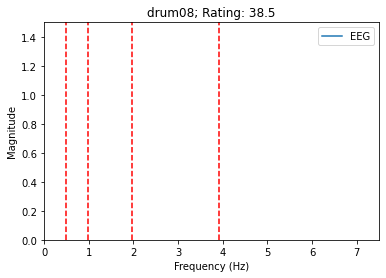

30400 [-3211340.01397558 -0.j               nan+nanj               nan+nanj ...
               nan+nanj               nan+nanj               nan+nanj] [0.00000000e+00 3.28947368e-02 6.57894737e-02 ... 4.99901316e+02
 4.99934211e+02 4.99967105e+02]


/tmp/ipykernel_33692/931776609.py:7: FutureWarning: Pass y=[-4.7060976e-06  4.6592468e-06  4.1917491e-07 ...  1.3943356e-05
  1.4430108e-06  7.8980156e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sf) / 60


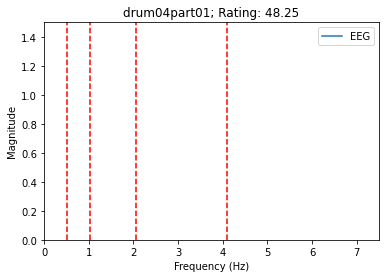

30400 [-3346769.06861091 -0.j               nan+nanj               nan+nanj ...
               nan+nanj               nan+nanj               nan+nanj] [0.00000000e+00 3.28947368e-02 6.57894737e-02 ... 4.99901316e+02
 4.99934211e+02 4.99967105e+02]


/tmp/ipykernel_33692/931776609.py:7: FutureWarning: Pass y=[ 0.02993511  0.02946313 -0.00365872 ...  0.00071352  0.0006937
  0.00063763], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sf) / 60


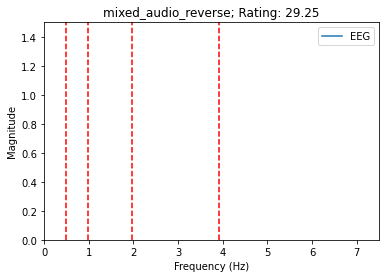

30400 [-2844019.65007352 -0.j               nan+nanj               nan+nanj ...
               nan+nanj               nan+nanj               nan+nanj] [0.00000000e+00 3.28947368e-02 6.57894737e-02 ... 4.99901316e+02
 4.99934211e+02 4.99967105e+02]


/tmp/ipykernel_33692/931776609.py:7: FutureWarning: Pass y=[-1.4825924e-06 -1.5338192e-06  4.2387987e-06 ...  1.1442771e-05
  1.5508151e-05  3.6923375e-06], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sf) / 60


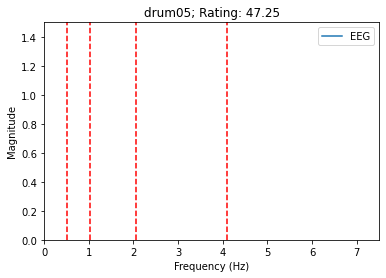

KeyboardInterrupt: 

In [45]:
# Finding FFT of one song and response
import matplotlib.pyplot as plt
os.chdir("/mnt/sda1/shivam/DrummingEEG/Stimuli")
tempo_notes = [0.25, 0.5, 1, 2]
for idx in range(len(stim_files)):
    song, sf = librosa.load(stim_files[idx] + '.wav')
    tempo = librosa.beat.tempo(song, sf) / 60

    N = len(all_song_eeg[stim_files[idx]])

    yf = fft(all_song_eeg[stim_files[idx]])
    xf = fftfreq(N, 1./1000)[:N//2]

    print(N, yf, xf)

    import matplotlib.pyplot as plt
  

    # Tempo
    for i in tempo_notes:
        plt.axvline(x=i*tempo, color="r", ls="--")

    # EEG Signals
    plt.plot(xf, 2.0/N * np.abs(yf[0:N_e//2]), label="EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(0, 7.5)
    plt.ylim(0, 1.5)

    plt.title(stim_files[idx] + "; Rating: " + str(rating_dict[stim_files[idx]] / 4))
    plt.legend()

    # plt.savefig("plot_src/" + stim_files[idx] +".pdf")
    plt.show()

In [41]:
float(all_song_eeg[stim_files[0]])

TypeError: only size-1 arrays can be converted to Python scalars

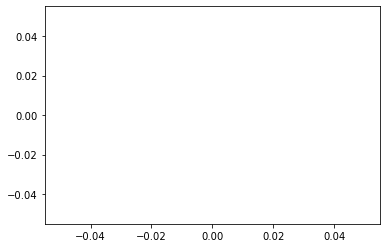

In [33]:
# Number of samples in normalized_tone
N = len(all_song_eeg[stim_files[0]])

yf = fft(all_song_eeg[stim_files[idx]])
xf = fftfreq(N, 1 / 1000)

plt.plot(xf, np.abs(yf))
plt.show()

# EEG classification of beats for CODS COMADS

In [6]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopo")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [50]:
data = loadmat("Drum07_mix_rev_2_3_clean_spec.mat")["spectra"]
data.shape

(467, 64, 65)

In [7]:
# Drum beat dict
drum_dict = {
    "drum01part01": 0,
    "drum01part02": 1,
    "drum02": 2,
    "drum03": 3,
    "drum04part01": 4,
    "drum04part02": 5,
    "drum05": 6,
    "drum06": 7,
    "drum07": 8,
    "drum08": 9,
    "drum09": 10,
    "drum10": 11,
    "drum11": 12,
    "mix": 13,
    "mix_rev": 14
}

In [8]:
X, y = [], []
for mat in processed:
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    if "mix_rev" in mat:
        y += [14] * data.shape[0]
    else:
        label = drum_dict[mat.split("_")[1]]
        y += [label]* data.shape[0] 
    
    print(X.shape, len(y))
    assert(X.shape[0] == len(y)), mat

(467, 64, 65, 1) 467
(934, 64, 65, 1) 934
(1401, 64, 65, 1) 1401
(1868, 64, 65, 1) 1868
(2335, 64, 65, 1) 2335
(2802, 64, 65, 1) 2802
(3269, 64, 65, 1) 3269
(3736, 64, 65, 1) 3736
(4202, 64, 65, 1) 4202
(4669, 64, 65, 1) 4669
(5136, 64, 65, 1) 5136
(5603, 64, 65, 1) 5603
(6070, 64, 65, 1) 6070
(6537, 64, 65, 1) 6537
(7004, 64, 65, 1) 7004
(7471, 64, 65, 1) 7471
(7938, 64, 65, 1) 7938
(8405, 64, 65, 1) 8405
(8872, 64, 65, 1) 8872
(9339, 64, 65, 1) 9339
(9806, 64, 65, 1) 9806
(10273, 64, 65, 1) 10273
(10740, 64, 65, 1) 10740
(11207, 64, 65, 1) 11207
(11674, 64, 65, 1) 11674
(12141, 64, 65, 1) 12141
(12608, 64, 65, 1) 12608
(13075, 64, 65, 1) 13075
(13542, 64, 65, 1) 13542
(14009, 64, 65, 1) 14009
(14476, 64, 65, 1) 14476
(14943, 64, 65, 1) 14943
(15410, 64, 65, 1) 15410
(15877, 64, 65, 1) 15877
(16344, 64, 65, 1) 16344
(16811, 64, 65, 1) 16811
(17278, 64, 65, 1) 17278
(17745, 64, 65, 1) 17745
(18212, 64, 65, 1) 18212
(18679, 64, 65, 1) 18679
(19146, 64, 65, 1) 19146
(19613, 64, 65, 1) 19

(150365, 64, 65, 1) 150365
(150832, 64, 65, 1) 150832
(151299, 64, 65, 1) 151299
(151766, 64, 65, 1) 151766
(152233, 64, 65, 1) 152233
(152700, 64, 65, 1) 152700
(153166, 64, 65, 1) 153166
(153633, 64, 65, 1) 153633
(154100, 64, 65, 1) 154100
(154567, 64, 65, 1) 154567
(155034, 64, 65, 1) 155034
(155501, 64, 65, 1) 155501
(155968, 64, 65, 1) 155968
(156435, 64, 65, 1) 156435
(156902, 64, 65, 1) 156902
(157369, 64, 65, 1) 157369
(157836, 64, 65, 1) 157836
(158303, 64, 65, 1) 158303
(158770, 64, 65, 1) 158770
(159237, 64, 65, 1) 159237
(159704, 64, 65, 1) 159704
(160171, 64, 65, 1) 160171
(160638, 64, 65, 1) 160638
(161105, 64, 65, 1) 161105
(161572, 64, 65, 1) 161572
(162039, 64, 65, 1) 162039
(162506, 64, 65, 1) 162506
(162973, 64, 65, 1) 162973
(163440, 64, 65, 1) 163440
(163907, 64, 65, 1) 163907
(164374, 64, 65, 1) 164374
(164841, 64, 65, 1) 164841
(165308, 64, 65, 1) 165308
(165775, 64, 65, 1) 165775
(166242, 64, 65, 1) 166242
(166709, 64, 65, 1) 166709
(167176, 64, 65, 1) 167176
(

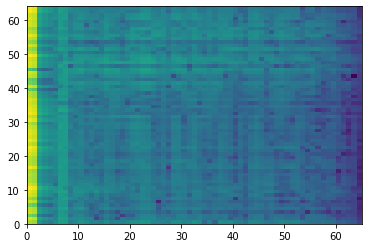

In [24]:
plt.pcolormesh(X[0][:, :,0])
plt.savefig("sample-specgram.png")

In [9]:
y = np.array(y)
y.shape

(238156,)

In [10]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape

((152419, 64, 65, 1),
 (47632, 64, 65, 1),
 (38105, 64, 65, 1),
 (152419,),
 (47632,),
 (38105,))

In [15]:
X_eval, X_train, y_eval, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_eval, y_eval, test_size=0.2, random_state=42)

X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape

((47632, 64, 65, 1),
 (38105, 64, 65, 1),
 (152419, 64, 65, 1),
 (47632,),
 (38105,),
 (152419,))

In [54]:
def create_model():
    model = Sequential()
    
    model.add(Convolution2D(32,(3, 3), input_shape=(64, 65, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(65,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(512,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(.5))
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(.5))
    
    model.add(Dense(15, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
    
    model.summary()
    return model

model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 63, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 65)        18785     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 65)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 256)       150016    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)        0

In [55]:
def create_checkpoint():
    checkpoint_filepath = '/tmp/checkpoint/'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    return checkpoint_filepath, model_checkpoint_callback

checkpoint_filepath, model_checkpoint_callback = create_checkpoint()
checkpoint_filepath

'/tmp/checkpoint/'

In [59]:
batch_size = 512
EPOCHS = 20

In [60]:
batch_size = 512
EPOCHS = 20
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=EPOCHS,
    validation_data=(X_eval, y_eval),
    callbacks=[model_checkpoint_callback],
    verbose=1
)

Epoch 1/20
94/94 [==============================] - 6s 63ms/step - loss: 0.7742 - accuracy: 0.7262 - val_loss: 0.7006 - val_accuracy: 0.7534
Epoch 2/20
94/94 [==============================] - 5s 56ms/step - loss: 0.6715 - accuracy: 0.7631 - val_loss: 0.4598 - val_accuracy: 0.8362
Epoch 3/20
94/94 [==============================] - 5s 55ms/step - loss: 0.5085 - accuracy: 0.8199 - val_loss: 0.4740 - val_accuracy: 0.8321
Epoch 4/20
94/94 [==============================] - 5s 57ms/step - loss: 0.4658 - accuracy: 0.8350 - val_loss: 0.3530 - val_accuracy: 0.8758
Epoch 5/20
94/94 [==============================] - 5s 55ms/step - loss: 0.3772 - accuracy: 0.8669 - val_loss: 0.3547 - val_accuracy: 0.8721
Epoch 6/20
94/94 [==============================] - 5s 57ms/step - loss: 0.3314 - accuracy: 0.8834 - val_loss: 0.2974 - val_accuracy: 0.8931
Epoch 7/20
94/94 [==============================] - 5s 56ms/step - loss: 0.2922 - accuracy: 0.8960 - val_loss: 0.2842 - val_accuracy: 0.8965
Epoch 8/20
94

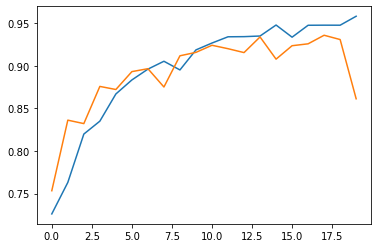

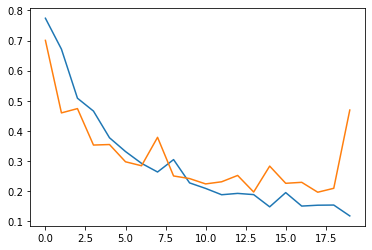

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [62]:
model.load_weights(checkpoint_filepath)
model.save('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Models/model-v2')

16-Sep-22 11:38:45 | WARNING | Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 4 of 4). These functions will not be directly callable after loading.


In [16]:
new_model = tf.keras.models.load_model('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Models/model-v2')

y_pred = np.argmax(new_model.predict(X_test), axis=1)
y_true = y_test
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy main: {test_acc:.0%}')

4764/4764 [==============================] - 13s 3ms/step
Test set accuracy main: 94%


In [17]:
X_test.shape

(152419, 64, 65, 1)

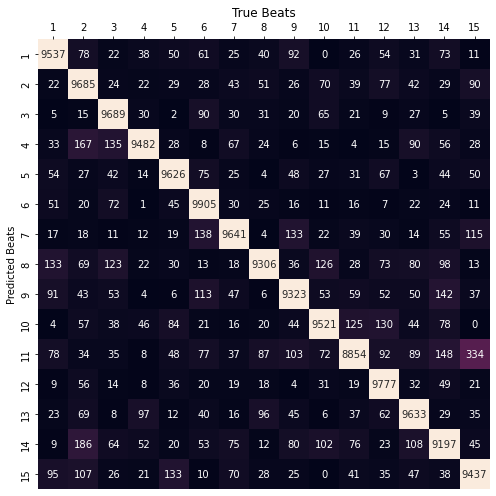

In [18]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize = (7,7))
hm1 = sns.heatmap(confusion_matrix, annot=True, cbar=False, vmin=0, vmax=1500,fmt='g')

hm1.set(title='True Beats', ylabel='Predicted Beats')
hm1.xaxis.tick_top()

hm1.set_xticklabels([int(i.get_text())+1 for i in hm1.get_xticklabels()])
hm1.set_yticklabels([int(i.get_text())+1 for i in hm1.get_yticklabels()])
plt.tight_layout()
file_name = "beat_classification_confusion_matrix_reverse_sizes"
os.chdir('/mnt/sda1/shivam/DrummingEEG/FullStudyData/images')
hm1.get_figure().savefig(file_name + ".png")

In [17]:
os.getcwd()

'/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopo'

In [36]:
os.chdir('/mnt/sda1/shivam/DrummingEEG/FullStudyData/images')

In [25]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 kB 9.5 MB/s eta 0:00:00 MB/s eta 0:00:01


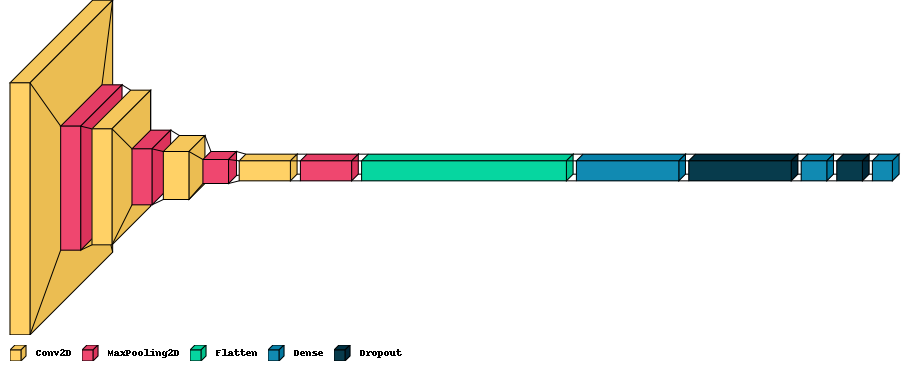

In [38]:
import visualkeras

model = new_model
visualkeras.layered_view(model, legend=True).show()  # font is optional!
visualkeras.layered_view(model, legend=True, to_file='output.png') # write to disk

# Participant classification [CODS-COMADS]

In [2]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopo")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [20]:
os.chdir('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopo/')
X, y = [], []
for mat in processed:
#     print(mat)
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    label = mat.split("_")[0]
    y += [label]* data.shape[0] 
    
    print(X.shape, len(y))
    assert(X.shape[0] == len(y)), mat

(467, 64, 65, 1) 467
(934, 64, 65, 1) 934
(1401, 64, 65, 1) 1401
(1868, 64, 65, 1) 1868
(2335, 64, 65, 1) 2335
(2802, 64, 65, 1) 2802
(3269, 64, 65, 1) 3269
(3736, 64, 65, 1) 3736
(4202, 64, 65, 1) 4202
(4669, 64, 65, 1) 4669
(5136, 64, 65, 1) 5136
(5603, 64, 65, 1) 5603
(6070, 64, 65, 1) 6070
(6537, 64, 65, 1) 6537
(7004, 64, 65, 1) 7004
(7471, 64, 65, 1) 7471
(7938, 64, 65, 1) 7938
(8405, 64, 65, 1) 8405
(8872, 64, 65, 1) 8872
(9339, 64, 65, 1) 9339
(9806, 64, 65, 1) 9806
(10273, 64, 65, 1) 10273
(10740, 64, 65, 1) 10740
(11207, 64, 65, 1) 11207
(11674, 64, 65, 1) 11674
(12141, 64, 65, 1) 12141
(12608, 64, 65, 1) 12608
(13075, 64, 65, 1) 13075
(13542, 64, 65, 1) 13542
(14009, 64, 65, 1) 14009
(14476, 64, 65, 1) 14476
(14943, 64, 65, 1) 14943
(15410, 64, 65, 1) 15410
(15877, 64, 65, 1) 15877
(16344, 64, 65, 1) 16344
(16811, 64, 65, 1) 16811
(17278, 64, 65, 1) 17278
(17745, 64, 65, 1) 17745
(18212, 64, 65, 1) 18212
(18679, 64, 65, 1) 18679
(19146, 64, 65, 1) 19146
(19613, 64, 65, 1) 19

(150365, 64, 65, 1) 150365
(150832, 64, 65, 1) 150832
(151299, 64, 65, 1) 151299
(151766, 64, 65, 1) 151766
(152233, 64, 65, 1) 152233
(152700, 64, 65, 1) 152700
(153166, 64, 65, 1) 153166
(153633, 64, 65, 1) 153633
(154100, 64, 65, 1) 154100
(154567, 64, 65, 1) 154567
(155034, 64, 65, 1) 155034
(155501, 64, 65, 1) 155501
(155968, 64, 65, 1) 155968
(156435, 64, 65, 1) 156435
(156902, 64, 65, 1) 156902
(157369, 64, 65, 1) 157369
(157836, 64, 65, 1) 157836
(158303, 64, 65, 1) 158303
(158770, 64, 65, 1) 158770
(159237, 64, 65, 1) 159237
(159704, 64, 65, 1) 159704
(160171, 64, 65, 1) 160171
(160638, 64, 65, 1) 160638
(161105, 64, 65, 1) 161105
(161572, 64, 65, 1) 161572
(162039, 64, 65, 1) 162039
(162506, 64, 65, 1) 162506
(162973, 64, 65, 1) 162973
(163440, 64, 65, 1) 163440
(163907, 64, 65, 1) 163907
(164374, 64, 65, 1) 164374
(164841, 64, 65, 1) 164841
(165308, 64, 65, 1) 165308
(165775, 64, 65, 1) 165775
(166242, 64, 65, 1) 166242
(166709, 64, 65, 1) 166709
(167176, 64, 65, 1) 167176
(

In [21]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
yt = le.transform(y)
yt

array([12, 12, 12, ..., 11, 11, 11])

In [22]:
np.unique(yt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [23]:
# Big train
X_train, X_eval, y_train, y_eval = train_test_split(X, np.array(yt), test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape

((152419, 64, 65, 1),
 (47632, 64, 65, 1),
 (38105, 64, 65, 1),
 (152419,),
 (47632,),
 (38105,))

In [28]:
# Small train
X_eval, X_train, y_eval, y_train = train_test_split(X, yt, test_size=0.2, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_eval, y_eval, test_size=0.2, random_state=42)
X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape

((47632, 64, 65, 1),
 (38105, 64, 65, 1),
 (152419, 64, 65, 1),
 (47632,),
 (38105,),
 (152419,))

In [18]:
def create_part_model():
    model = Sequential()
    
    model.add(Convolution2D(32,(3, 3), input_shape=(64, 65, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(65,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(512,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(.5))
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(.5))
    
    model.add(Dense(17, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
    
    model.summary()
    return model

model = create_part_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 63, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 65)        18785     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 65)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 256)       150016    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 256)       

In [19]:
def create_checkpoint():
    checkpoint_filepath = '/tmp/checkpoint/'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    return checkpoint_filepath, model_checkpoint_callback

checkpoint_filepath, model_checkpoint_callback = create_checkpoint()
checkpoint_filepath

'/tmp/checkpoint/'

In [20]:
batch_size = 512
EPOCHS = 20
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=EPOCHS,
    validation_data=(X_eval, y_eval),
    callbacks=[model_checkpoint_callback],
    verbose=1
)

Epoch 1/20
94/94 [==============================] - 7s 65ms/step - loss: 1.1187 - accuracy: 0.6176 - val_loss: 0.0412 - val_accuracy: 0.9856
Epoch 2/20
94/94 [==============================] - 5s 56ms/step - loss: 0.0262 - accuracy: 0.9928 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 3/20
94/94 [==============================] - 5s 56ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 4.8309e-04 - val_accuracy: 0.9999
Epoch 4/20
94/94 [==============================] - 5s 56ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 3.1861e-04 - val_accuracy: 0.9999
Epoch 5/20
94/94 [==============================] - 5s 55ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 4.2198e-04 - val_accuracy: 0.9998
Epoch 6/20
94/94 [==============================] - 5s 56ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 7/20
94/94 [==============================] - 5s 55ms/step - loss: 0.0657 - accuracy: 0.9845 - val_loss: 5.1077e-04 - val_accuracy: 0.99

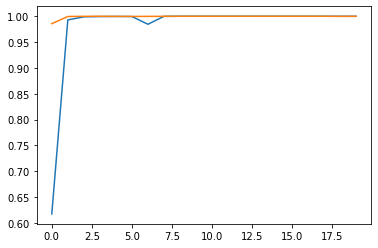

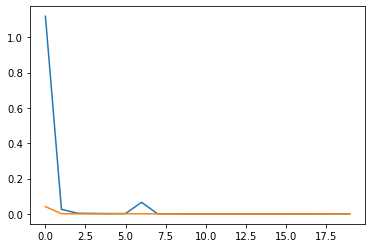

In [21]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [22]:
model.load_weights(checkpoint_filepath)
model.save('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Models/model-part-v2')

16-Sep-22 13:16:48 | WARNING | Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 4 of 4). These functions will not be directly callable after loading.


In [29]:
new_model = tf.keras.models.load_model('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Models/model-part-v2')

y_pred = np.argmax(new_model.predict(X_test), axis=1)
y_true = y_test
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy main: {test_acc:.0%}')

4764/4764 [==============================] - 13s 3ms/step
Test set accuracy main: 100%


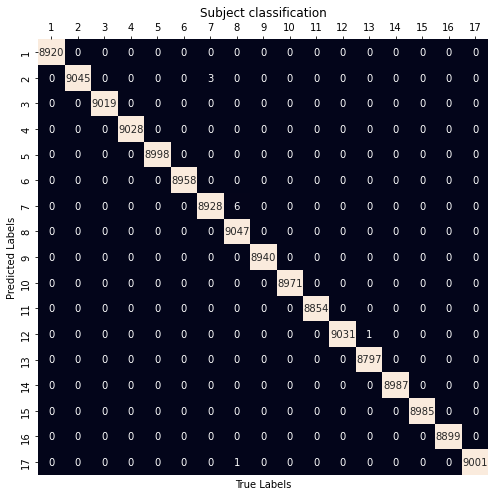

In [30]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize = (7,7))
hm1 = sns.heatmap(confusion_matrix, annot=True, cbar=False, vmin=0, vmax=1500,fmt='g')

hm1.set(title='Subject classification', xlabel="True Labels", ylabel='Predicted Labels')
hm1.xaxis.tick_top()

hm1.set_xticklabels([int(i.get_text())+1 for i in hm1.get_xticklabels()])
hm1.set_yticklabels([int(i.get_text())+1 for i in hm1.get_yticklabels()])
plt.tight_layout()
file_name = "sub_classification_confusion_matrix_reversed_set"
os.chdir('/mnt/sda1/shivam/DrummingEEG/FullStudyData/images')
hm1.get_figure().savefig(file_name + ".png")

# Drum beat generalization

In [31]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopo")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [32]:
# Drum beat dict
drum_dict = {
    "drum01part01": 0,
    "drum01part02": 1,
    "drum02": 2,
    "drum03": 3,
    "drum04part01": 4,
    "drum04part02": 5,
    "drum05": 6,
    "drum06": 7,
    "drum07": 8,
    "drum08": 9,
    "drum09": 10,
    "drum10": 11,
    "drum11": 12,
    "mix": 13,
    "mix_rev": 14
}

In [34]:
os.chdir('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopo/')
X, ypart, ydrum = [], [], []
for mat in processed:
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    label_p = mat.split("_")[0]
    ypart += [label_p]* data.shape[0] 
    
    if "mix_rev" in mat:
        ydrum += [14] * data.shape[0]
    else:
        label_d = drum_dict[mat.split("_")[1]]
        ydrum += [label_d]* data.shape[0]

    print(X.shape, len(ypart), len(ydrum))
    assert(X.shape[0] == len(ypart)), mat
    assert(X.shape[0] == len(ydrum)), mat

(467, 64, 65, 1) 467 467
(934, 64, 65, 1) 934 934
(1401, 64, 65, 1) 1401 1401
(1868, 64, 65, 1) 1868 1868
(2335, 64, 65, 1) 2335 2335
(2802, 64, 65, 1) 2802 2802
(3269, 64, 65, 1) 3269 3269
(3736, 64, 65, 1) 3736 3736
(4202, 64, 65, 1) 4202 4202
(4669, 64, 65, 1) 4669 4669
(5136, 64, 65, 1) 5136 5136
(5603, 64, 65, 1) 5603 5603
(6070, 64, 65, 1) 6070 6070
(6537, 64, 65, 1) 6537 6537
(7004, 64, 65, 1) 7004 7004
(7471, 64, 65, 1) 7471 7471
(7938, 64, 65, 1) 7938 7938
(8405, 64, 65, 1) 8405 8405
(8872, 64, 65, 1) 8872 8872
(9339, 64, 65, 1) 9339 9339
(9806, 64, 65, 1) 9806 9806
(10273, 64, 65, 1) 10273 10273
(10740, 64, 65, 1) 10740 10740
(11207, 64, 65, 1) 11207 11207
(11674, 64, 65, 1) 11674 11674
(12141, 64, 65, 1) 12141 12141
(12608, 64, 65, 1) 12608 12608
(13075, 64, 65, 1) 13075 13075
(13542, 64, 65, 1) 13542 13542
(14009, 64, 65, 1) 14009 14009
(14476, 64, 65, 1) 14476 14476
(14943, 64, 65, 1) 14943 14943
(15410, 64, 65, 1) 15410 15410
(15877, 64, 65, 1) 15877 15877
(16344, 64, 65,

(122811, 64, 65, 1) 122811 122811
(123278, 64, 65, 1) 123278 123278
(123745, 64, 65, 1) 123745 123745
(124212, 64, 65, 1) 124212 124212
(124679, 64, 65, 1) 124679 124679
(125146, 64, 65, 1) 125146 125146
(125613, 64, 65, 1) 125613 125613
(126080, 64, 65, 1) 126080 126080
(126547, 64, 65, 1) 126547 126547
(127014, 64, 65, 1) 127014 127014
(127481, 64, 65, 1) 127481 127481
(127948, 64, 65, 1) 127948 127948
(128415, 64, 65, 1) 128415 128415
(128882, 64, 65, 1) 128882 128882
(129349, 64, 65, 1) 129349 129349
(129816, 64, 65, 1) 129816 129816
(130283, 64, 65, 1) 130283 130283
(130750, 64, 65, 1) 130750 130750
(131217, 64, 65, 1) 131217 131217
(131684, 64, 65, 1) 131684 131684
(132151, 64, 65, 1) 132151 132151
(132618, 64, 65, 1) 132618 132618
(133085, 64, 65, 1) 133085 133085
(133552, 64, 65, 1) 133552 133552
(134019, 64, 65, 1) 134019 134019
(134486, 64, 65, 1) 134486 134486
(134953, 64, 65, 1) 134953 134953
(135420, 64, 65, 1) 135420 135420
(135887, 64, 65, 1) 135887 135887
(136354, 64, 6

(235354, 64, 65, 1) 235354 235354
(235821, 64, 65, 1) 235821 235821
(236288, 64, 65, 1) 236288 236288
(236755, 64, 65, 1) 236755 236755
(237222, 64, 65, 1) 237222 237222
(237689, 64, 65, 1) 237689 237689
(238156, 64, 65, 1) 238156 238156


In [35]:
ypart = np.array(ypart)
ydrum = np.array(ydrum)
ypart.shape, ydrum.shape, np.unique(ypart), np.unique(ydrum)

((238156,),
 (238156,),
 array(['Drum01', 'Drum02', 'Drum03', 'Drum04', 'Drum05', 'Drum06',
        'Drum07', 'Drum08', 'Drum09', 'Drum10', 'Drum11', 'Drum12',
        'Drum13', 'Drum14', 'Drum15', 'Subj2', 'Subj4'], dtype='<U6'),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [36]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(ypart)
ytpart = le.transform(ypart)
ytpart

array([12, 12, 12, ..., 11, 11, 11])

In [38]:
np.unique(ytpart)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [65]:
X[(ytpart < 13)].shape

(182130, 64, 65, 1)

In [67]:
# We have a total of 17 participants. We can train on 13, evaluate on 2 and test on 2.
X_train, X_eval, X_test = X[(ytpart < 13)], X[(ytpart == 13) | (ytpart == 14)], X[(ytpart == 15) | (ytpart == 16)]
y_train, y_eval, y_test = ydrum[(ytpart < 13)], ydrum[(ytpart == 13) | (ytpart == 14)], ydrum[(ytpart == 15) | (ytpart == 16)]
X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape


((182130, 64, 65, 1),
 (28020, 64, 65, 1),
 (28006, 64, 65, 1),
 (182130,),
 (28020,),
 (28006,))

In [44]:
# # Big train
# X_train, X_eval, y_train, y_eval = train_test_split(X, np.array(yt), test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape

In [ ]:
# # Small train
# X_eval, X_train, y_eval, y_train = train_test_split(X, yt, test_size=0.2, random_state=42)
# X_test, X_eval, y_test, y_eval = train_test_split(X_eval, y_eval, test_size=0.2, random_state=42)
# X_train.shape, X_eval.shape, X_test.shape, y_train.shape, y_eval.shape, y_test.shape

In [78]:
def create_part_model():
    model = Sequential()
    
    model.add(Convolution2D(32,(3, 3), input_shape=(64, 65, 1), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(64,(3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(128,(3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256,(3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(512,(3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(.5))
    
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(.5))
    
    model.add(Dense(15, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
    
    model.summary()
    return model

model = create_part_model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 64, 65, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)       

In [79]:
def create_checkpoint():
    checkpoint_filepath = '/tmp/checkpoint/'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    return checkpoint_filepath, model_checkpoint_callback

checkpoint_filepath, model_checkpoint_callback = create_checkpoint()
checkpoint_filepath

'/tmp/checkpoint/'

In [80]:
batch_size = 512
EPOCHS = 10
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=EPOCHS,
    validation_data=(X_eval, y_eval),
    callbacks=[model_checkpoint_callback],
    verbose=1
)

Epoch 1/10
356/356 [==============================] - 21s 52ms/step - loss: 2.6785 - accuracy: 0.0823 - val_loss: 2.7185 - val_accuracy: 0.0752
Epoch 2/10
356/356 [==============================] - 16s 44ms/step - loss: 1.3818 - accuracy: 0.5331 - val_loss: 4.8699 - val_accuracy: 0.0396
Epoch 3/10
356/356 [==============================] - 16s 46ms/step - loss: 0.2742 - accuracy: 0.9068 - val_loss: 5.0132 - val_accuracy: 0.0413
Epoch 4/10
356/356 [==============================] - 16s 46ms/step - loss: 0.1426 - accuracy: 0.9518 - val_loss: 5.5508 - val_accuracy: 0.0479
Epoch 5/10
356/356 [==============================] - 16s 45ms/step - loss: 0.1064 - accuracy: 0.9644 - val_loss: 5.4784 - val_accuracy: 0.0446
Epoch 6/10
356/356 [==============================] - 16s 46ms/step - loss: 0.0804 - accuracy: 0.9727 - val_loss: 6.2211 - val_accuracy: 0.0574
Epoch 7/10
356/356 [==============================] - 16s 45ms/step - loss: 0.0685 - accuracy: 0.9770 - val_loss: 6.2814 - val_accuracy:

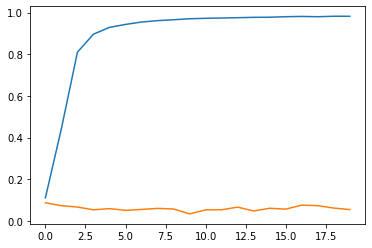

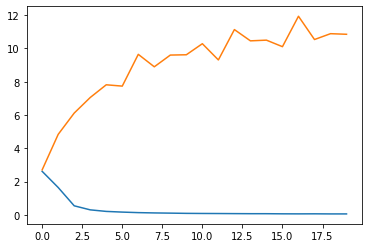

In [71]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
model.load_weights(checkpoint_filepath)
model.save('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Models/model-cross-sub-v1')

In [ ]:
new_model = tf.keras.models.load_model('/mnt/sda1/shivam/DrummingEEG/FullStudyData/Models/model-part-v1')

y_pred = np.argmax(new_model.predict(X_test), axis=1)
y_true = y_test
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy main: {test_acc:.0%}')

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)

plt.figure(figsize = (7,7))
hm1 = sns.heatmap(confusion_matrix, annot=True, cbar=False, vmin=0, vmax=1500,fmt='g')

hm1.set(title='Subject classification', ylabel='Beat')
hm1.xaxis.tick_top()

hm1.set_xticklabels([int(i.get_text())+1 for i in hm1.get_xticklabels()])
hm1.set_yticklabels([int(i.get_text())+1 for i in hm1.get_yticklabels()])
plt.tight_layout()
file_name = "beat_classification_cross_subject"
os.chdir('/mnt/sda1/shivam/DrummingEEG/FullStudyData/images')
hm1.get_figure().savefig(file_name + ".png")

# Participant Classification Spectopo [frequency domain]

In [2]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopov2")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [3]:
# Participant classification (not drumming)
X, y = [], []
for mat in processed:
#     print(mat)
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    label = mat.split("_")[0]
    y += [label]* data.shape[0] 
    
    print(X.shape, len(y))
    assert(X.shape[0] == len(y)), mat

(453, 64, 501, 1) 453
(906, 64, 501, 1) 906
(1359, 64, 501, 1) 1359
(1812, 64, 501, 1) 1812
(2265, 64, 501, 1) 2265
(2719, 64, 501, 1) 2719
(3172, 64, 501, 1) 3172
(3625, 64, 501, 1) 3625
(4078, 64, 501, 1) 4078
(4531, 64, 501, 1) 4531
(4984, 64, 501, 1) 4984
(5437, 64, 501, 1) 5437
(5890, 64, 501, 1) 5890
(6344, 64, 501, 1) 6344
(6797, 64, 501, 1) 6797
(7250, 64, 501, 1) 7250
(7703, 64, 501, 1) 7703
(8156, 64, 501, 1) 8156
(8609, 64, 501, 1) 8609
(9062, 64, 501, 1) 9062
(9515, 64, 501, 1) 9515
(9968, 64, 501, 1) 9968
(10422, 64, 501, 1) 10422
(10875, 64, 501, 1) 10875
(11328, 64, 501, 1) 11328
(11781, 64, 501, 1) 11781
(12234, 64, 501, 1) 12234
(12688, 64, 501, 1) 12688
(13141, 64, 501, 1) 13141
(13594, 64, 501, 1) 13594
(14048, 64, 501, 1) 14048
(14502, 64, 501, 1) 14502
(14955, 64, 501, 1) 14955
(15408, 64, 501, 1) 15408
(15861, 64, 501, 1) 15861
(16314, 64, 501, 1) 16314
(16768, 64, 501, 1) 16768
(17221, 64, 501, 1) 17221
(17674, 64, 501, 1) 17674
(18127, 64, 501, 1) 18127
(18581, 

(141394, 64, 501, 1) 141394
(141847, 64, 501, 1) 141847
(142300, 64, 501, 1) 142300
(142753, 64, 501, 1) 142753
(143207, 64, 501, 1) 143207
(143660, 64, 501, 1) 143660
(144113, 64, 501, 1) 144113
(144566, 64, 501, 1) 144566
(145019, 64, 501, 1) 145019
(145472, 64, 501, 1) 145472
(145925, 64, 501, 1) 145925
(146378, 64, 501, 1) 146378
(146831, 64, 501, 1) 146831
(147285, 64, 501, 1) 147285
(147738, 64, 501, 1) 147738
(148191, 64, 501, 1) 148191
(148644, 64, 501, 1) 148644
(149097, 64, 501, 1) 149097
(149551, 64, 501, 1) 149551
(150004, 64, 501, 1) 150004
(150457, 64, 501, 1) 150457
(150911, 64, 501, 1) 150911
(151365, 64, 501, 1) 151365
(151818, 64, 501, 1) 151818
(152271, 64, 501, 1) 152271
(152724, 64, 501, 1) 152724
(153177, 64, 501, 1) 153177
(153631, 64, 501, 1) 153631
(154084, 64, 501, 1) 154084
(154537, 64, 501, 1) 154537
(154990, 64, 501, 1) 154990
(155443, 64, 501, 1) 155443
(155897, 64, 501, 1) 155897
(156351, 64, 501, 1) 156351
(156804, 64, 501, 1) 156804
(157257, 64, 501, 1)

In [4]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
yt = le.transform(y)
yt, np.unique(yt)

(array([12, 12, 12, ..., 11, 11, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]))

In [5]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [6]:
# source : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

clfs = [
    KNeighborsClassifier(2),
    # SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(max_depth=200, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "Nearest Neighbors",
    # "Linear SVM",
#     "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]


## Channel-wise prediction

In [7]:
# Chance: 100/17 ~ 5.88%
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=5):
    scores_chan_spectopo = {}
    for chan in range(64):
        Xc, yc = X[:, chan, :, 0], yt
        X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)

        print("Channel Number: ", chan)
        scores_chan_spectopo[chan] = []
        for idx, clf in enumerate(clfs):
            clf.fit(X_train, y_train)
            score = clf.score(X_eval, y_eval)
            scores_chan_spectopo[chan].append(score)
            print(clfs[idx], ": ", score)

Channel Number:  0
KNeighborsClassifier(n_neighbors=2) :  0.9998702001081666
DecisionTreeClassifier(max_depth=200) :  0.9874743104380747
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.798939967550027
MLPClassifier(alpha=1, max_iter=1000) :  9.870632774472687e-01
AdaBoostClassifier() :  2.6487831260140615e-01
GaussianNB() :  0.7829529475392104
QuadraticDiscriminantAnalysis() :  0.9787560843699297
Channel Number:  1
KNeighborsClassifier(n_neighbors=2) :  0.9948296376419686
DecisionTreeClassifier(max_depth=200) :  0.9822390481341265
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8002595997836669
MLPClassifier(alpha=1, max_iter=1000) :  9.788209843158464e-01
AdaBoostClassifier() :  2.3357490535424555e-01
GaussianNB() :  0.7824986479177934
QuadraticDiscriminantAnalysis() :  0.9574256354786371
Channel Number:  2
KNeighborsClassifier(n_neighbors=2) :  0.9993077339102218
DecisionTreeClassifier(max_depth=200) :  0.9897458085451596
Random

DecisionTreeClassifier(max_depth=200) :  0.9855705786911845
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8001081665765278
MLPClassifier(alpha=1, max_iter=1000) :  9.591346673877772e-01
AdaBoostClassifier() :  3.630502974580854e-01
GaussianNB() :  0.7988318009734992
QuadraticDiscriminantAnalysis() :  0.9840129799891834
Channel Number:  20
KNeighborsClassifier(n_neighbors=2) :  0.9999567333693888
DecisionTreeClassifier(max_depth=200) :  0.9899837750135209
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8151865873445105
MLPClassifier(alpha=1, max_iter=1000) :  9.696917252568956e-01
AdaBoostClassifier() :  1.7464575446187128e-01
GaussianNB() :  0.8250513791238507
QuadraticDiscriminantAnalysis() :  0.9893780421849648
Channel Number:  21
KNeighborsClassifier(n_neighbors=2) :  0.9999134667387777
DecisionTreeClassifier(max_depth=200) :  0.9902650081124933
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.80908

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7806165494862087
MLPClassifier(alpha=1, max_iter=1000) :  9.423904813412656e-01
AdaBoostClassifier() :  3.3834505137912385e-01
GaussianNB() :  0.8276257436452136
QuadraticDiscriminantAnalysis() :  0.9888588426176311
Channel Number:  39
KNeighborsClassifier(n_neighbors=2) :  0.9998702001081666
DecisionTreeClassifier(max_depth=200) :  0.9921254732287723
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7791238507301244
MLPClassifier(alpha=1, max_iter=1000) :  9.373715521903732e-01
AdaBoostClassifier() :  5.212547322877231e-01
GaussianNB() :  0.8318442401297999
QuadraticDiscriminantAnalysis() :  0.9812222823147647
Channel Number:  40
KNeighborsClassifier(n_neighbors=2) :  0.9998918334234721
DecisionTreeClassifier(max_depth=200) :  0.9855489453758789
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8252244456462953
MLPClassifier(alpha=1, max_iter=1000) :  9.71032

MLPClassifier(alpha=1, max_iter=1000) :  9.579881016765819e-01
AdaBoostClassifier() :  1.0942130881557599e-01
GaussianNB() :  0.7194375338020552
QuadraticDiscriminantAnalysis() :  0.9630935640886966
Channel Number:  58
KNeighborsClassifier(n_neighbors=2) :  0.998139534883721
DecisionTreeClassifier(max_depth=200) :  0.9897025419145484
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8171335857220119
MLPClassifier(alpha=1, max_iter=1000) :  9.691508923742563e-01
AdaBoostClassifier() :  1.5325040562466197e-01
GaussianNB() :  0.7355110870740941
QuadraticDiscriminantAnalysis() :  0.9739751216873986
Channel Number:  59
KNeighborsClassifier(n_neighbors=2) :  0.997425635478637
DecisionTreeClassifier(max_depth=200) :  0.977328285559762
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8053866955110871
MLPClassifier(alpha=1, max_iter=1000) :  9.657328285559762e-01
AdaBoostClassifier() :  2.4112493239588967e-01
GaussianNB() :  0.732677122769064

In [8]:
scores_df = pd.DataFrame(scores_chan_spectopo, columns=list(range(64)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_chan_wise_spectopo_part.csv", index=True)

## frequency-wise prediction

In [9]:
# Chance: 100/17 ~ 5.88%
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=5):
    scores_freq_spectopo = {}
    for freq in range(501):
        Xc, yc = X[:, :, freq, 0], yt
        X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)

        print("\n Frequency: ", freq)
        scores_freq_spectopo[freq] = []
        for idx, clf in enumerate(clfs):
            clf.fit(X_train, y_train)
            score = clf.score(X_eval, y_eval)
            scores_freq_spectopo[freq].append(score)
            print(clfs[idx], ": ", score)


 Frequency:  0
KNeighborsClassifier(n_neighbors=2) :  1.0
DecisionTreeClassifier(max_depth=200) :  1.0
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  1.0
MLPClassifier(alpha=1, max_iter=1000) :  1e+00
AdaBoostClassifier() :  3.5257977285018927e-01
GaussianNB() :  0.9999783666846944
QuadraticDiscriminantAnalysis() :  1.0

 Frequency:  1
KNeighborsClassifier(n_neighbors=2) :  1.0
DecisionTreeClassifier(max_depth=200) :  1.0
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  1.0
MLPClassifier(alpha=1, max_iter=1000) :  1e+00
AdaBoostClassifier() :  3.5257977285018927e-01
GaussianNB() :  0.9999783666846944
QuadraticDiscriminantAnalysis() :  1.0

 Frequency:  2
KNeighborsClassifier(n_neighbors=2) :  0.9797728501892915
DecisionTreeClassifier(max_depth=200) :  0.872947539210384
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.9115413737155219
MLPClassifier(alpha=1, max_iter=1000) :  9.866089778258518e-01
AdaBoostCla

AdaBoostClassifier() :  5.184207679826933e-01
GaussianNB() :  0.7136181719848567
QuadraticDiscriminantAnalysis() :  0.9778474851270957

 Frequency:  20
KNeighborsClassifier(n_neighbors=2) :  0.9863710113574905
DecisionTreeClassifier(max_depth=200) :  0.8914872904272579
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.9273985938345052
MLPClassifier(alpha=1, max_iter=1000) :  9.656030286641428e-01
AdaBoostClassifier() :  3.8487831260140615e-01
GaussianNB() :  0.6916819902650081
QuadraticDiscriminantAnalysis() :  0.9730665224445646

 Frequency:  21
KNeighborsClassifier(n_neighbors=2) :  0.9837317468902109
DecisionTreeClassifier(max_depth=200) :  0.8799567333693888
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.9179664683612764
MLPClassifier(alpha=1, max_iter=1000) :  9.602812330989724e-01
AdaBoostClassifier() :  2.868361276365603e-01
GaussianNB() :  0.6694429421308815
QuadraticDiscriminantAnalysis() :  0.9687398593834505

 Frequency:

KNeighborsClassifier(n_neighbors=2) :  0.8730557057869118
DecisionTreeClassifier(max_depth=200) :  0.7575121687398594
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7709897241752298
MLPClassifier(alpha=1, max_iter=1000) :  9.172525689561926e-01
AdaBoostClassifier() :  4.9222282314764737e-01
GaussianNB() :  0.4536722552731206
QuadraticDiscriminantAnalysis() :  0.8763439697133586

 Frequency:  40
KNeighborsClassifier(n_neighbors=2) :  0.7902217414818821
DecisionTreeClassifier(max_depth=200) :  0.71848566792861
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7258409951325041
MLPClassifier(alpha=1, max_iter=1000) :  8.922011898323418e-01
AdaBoostClassifier() :  2.7777176852352625e-01
GaussianNB() :  0.4881557598702001
QuadraticDiscriminantAnalysis() :  0.8384207679826934

 Frequency:  41
KNeighborsClassifier(n_neighbors=2) :  0.8701135749053542
DecisionTreeClassifier(max_depth=200) :  0.7080800432666307
RandomForestClassifier(max_dep

MLPClassifier(alpha=1, max_iter=1000) :  9.091617090319092e-01
AdaBoostClassifier() :  3.0280151433207136e-01
GaussianNB() :  0.5099405083829097
QuadraticDiscriminantAnalysis() :  0.8243591130340725

 Frequency:  59
KNeighborsClassifier(n_neighbors=2) :  0.9506760411032991
DecisionTreeClassifier(max_depth=200) :  0.7275500270416442
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7710546241211466
MLPClassifier(alpha=1, max_iter=1000) :  9.096809085992429e-01
AdaBoostClassifier() :  3.1504597079502433e-01
GaussianNB() :  0.5093131422390481
QuadraticDiscriminantAnalysis() :  0.8284261763115197

 Frequency:  60
KNeighborsClassifier(n_neighbors=2) :  0.9553055705786911
DecisionTreeClassifier(max_depth=200) :  0.7293888588426176
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7791022174148188
MLPClassifier(alpha=1, max_iter=1000) :  9.049215792320173e-01
AdaBoostClassifier() :  3.190481341265549e-01
GaussianNB() :  0.5126879394267172
Qu

GaussianNB() :  0.5446403461330449
QuadraticDiscriminantAnalysis() :  0.8493455922120065

 Frequency:  78
KNeighborsClassifier(n_neighbors=2) :  0.973802055164954
DecisionTreeClassifier(max_depth=200) :  0.7599783666846944
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8096917252568956
MLPClassifier(alpha=1, max_iter=1000) :  9.042509464575447e-01
AdaBoostClassifier() :  4.486749594375338e-01
GaussianNB() :  0.5445754461871282
QuadraticDiscriminantAnalysis() :  0.850427257977285

 Frequency:  79
KNeighborsClassifier(n_neighbors=2) :  0.9770037858301784
DecisionTreeClassifier(max_depth=200) :  0.7536830719307734
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8218496484586263
MLPClassifier(alpha=1, max_iter=1000) :  9.112601406165495e-01
AdaBoostClassifier() :  4.661763115197404e-01
GaussianNB() :  0.5482747431043807
QuadraticDiscriminantAnalysis() :  0.8486965927528394

 Frequency:  80
KNeighborsClassifier(n_neighbors=2) :  0.980

DecisionTreeClassifier(max_depth=200) :  0.7610816657652786
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8241211465657112
MLPClassifier(alpha=1, max_iter=1000) :  9.085559762033532e-01
AdaBoostClassifier() :  4.742671714440238e-01
GaussianNB() :  0.5649756625202812
QuadraticDiscriminantAnalysis() :  0.8529367225527312

 Frequency:  98
KNeighborsClassifier(n_neighbors=2) :  0.9795781503515414
DecisionTreeClassifier(max_depth=200) :  0.7609951325040563
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8191022174148188
MLPClassifier(alpha=1, max_iter=1000) :  9.092482422931314e-01
AdaBoostClassifier() :  4.768415359653867e-01
GaussianNB() :  0.5634829637641968
QuadraticDiscriminantAnalysis() :  0.8549269875608437

 Frequency:  99
KNeighborsClassifier(n_neighbors=2) :  0.9860897782585181
DecisionTreeClassifier(max_depth=200) :  0.8870957274202271
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.901287182260

MLPClassifier(alpha=1, max_iter=1000) :  8.997944835045971e-01
AdaBoostClassifier() :  4.5486208761492697e-01
GaussianNB() :  0.5614494321254733
QuadraticDiscriminantAnalysis() :  0.8441103299080585

 Frequency:  117
KNeighborsClassifier(n_neighbors=2) :  0.9829096809085992
DecisionTreeClassifier(max_depth=200) :  0.7600865332612223
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8166143861546782
MLPClassifier(alpha=1, max_iter=1000) :  8.947755543537047e-01
AdaBoostClassifier() :  3.773066522444565e-01
GaussianNB() :  0.5631368307193078
QuadraticDiscriminantAnalysis() :  0.8459491617090319

 Frequency:  118
KNeighborsClassifier(n_neighbors=2) :  0.9821957815035154
DecisionTreeClassifier(max_depth=200) :  0.7671389940508383
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8177176852352623
MLPClassifier(alpha=1, max_iter=1000) :  9.059167117360736e-01
AdaBoostClassifier() :  4.4227149810708494e-01
GaussianNB() :  0.5716170903190914


GaussianNB() :  0.5497458085451595
QuadraticDiscriminantAnalysis() :  0.8297025419145484

 Frequency:  136
KNeighborsClassifier(n_neighbors=2) :  0.981308815575987
DecisionTreeClassifier(max_depth=200) :  0.7657111952406707
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.813650621957815
MLPClassifier(alpha=1, max_iter=1000) :  9.010492157923202e-01
AdaBoostClassifier() :  4.7418063818280154e-01
GaussianNB() :  0.5346024878312602
QuadraticDiscriminantAnalysis() :  0.8251379123850731

 Frequency:  137
KNeighborsClassifier(n_neighbors=2) :  0.9816549486208761
DecisionTreeClassifier(max_depth=200) :  0.7693023255813953
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8167658193618172
MLPClassifier(alpha=1, max_iter=1000) :  8.967009194159005e-01
AdaBoostClassifier() :  4.8164413196322337e-01
GaussianNB() :  0.5318766901027583
QuadraticDiscriminantAnalysis() :  0.8213737155219037

 Frequency:  138
KNeighborsClassifier(n_neighbors=2) :  

KNeighborsClassifier(n_neighbors=2) :  0.980248783126014
DecisionTreeClassifier(max_depth=200) :  0.7551325040562467
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8056246619794484
MLPClassifier(alpha=1, max_iter=1000) :  8.827474310438075e-01
AdaBoostClassifier() :  3.2103839913466736e-01
GaussianNB() :  0.5271173607355327
QuadraticDiscriminantAnalysis() :  0.8139318550567874

 Frequency:  156
KNeighborsClassifier(n_neighbors=2) :  0.981763115197404
DecisionTreeClassifier(max_depth=200) :  0.7558464034613305
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8153163872363439
MLPClassifier(alpha=1, max_iter=1000) :  8.856246619794483e-01
AdaBoostClassifier() :  4.160951865873445e-01
GaussianNB() :  0.5327203893996755
QuadraticDiscriminantAnalysis() :  0.8100811249323959

 Frequency:  157
KNeighborsClassifier(n_neighbors=2) :  0.9824986479177934
DecisionTreeClassifier(max_depth=200) :  0.7543104380746349
RandomForestClassifier(max_de

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8060573282855598
MLPClassifier(alpha=1, max_iter=1000) :  8.799567333693888e-01
AdaBoostClassifier() :  3.442725797728502e-01
GaussianNB() :  0.4900811249323959
QuadraticDiscriminantAnalysis() :  0.7897890751757707

 Frequency:  175
KNeighborsClassifier(n_neighbors=2) :  0.9804218496484586
DecisionTreeClassifier(max_depth=200) :  0.742823147647377
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7972525689561926
MLPClassifier(alpha=1, max_iter=1000) :  8.739643050297458e-01
AdaBoostClassifier() :  3.101568415359654e-01
GaussianNB() :  0.486901027582477
QuadraticDiscriminantAnalysis() :  0.7855489453758788

 Frequency:  176
KNeighborsClassifier(n_neighbors=2) :  0.9787560843699297
DecisionTreeClassifier(max_depth=200) :  0.7419578150351541
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.807809626825311
MLPClassifier(alpha=1, max_iter=1000) :  8.7160627366143

MLPClassifier(alpha=1, max_iter=1000) :  8.607679826933478e-01
AdaBoostClassifier() :  3.9649540292049756e-01
GaussianNB() :  0.48534342888047594
QuadraticDiscriminantAnalysis() :  0.770881557598702

 Frequency:  194
KNeighborsClassifier(n_neighbors=2) :  0.9797728501892915
DecisionTreeClassifier(max_depth=200) :  0.7258409951325041
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7883180097349919
MLPClassifier(alpha=1, max_iter=1000) :  8.600973499188751e-01
AdaBoostClassifier() :  2.4512709572742022e-01
GaussianNB() :  0.48912925905895077
QuadraticDiscriminantAnalysis() :  0.7709680908599242

 Frequency:  195
KNeighborsClassifier(n_neighbors=2) :  0.980248783126014
DecisionTreeClassifier(max_depth=200) :  0.7205840995132504
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7852244456462953
MLPClassifier(alpha=1, max_iter=1000) :  8.552298539751216e-01
AdaBoostClassifier() :  3.6458626284478096e-01
GaussianNB() :  0.4849972958355868

GaussianNB() :  0.4829421308815576
QuadraticDiscriminantAnalysis() :  0.757836668469443

 Frequency:  213
KNeighborsClassifier(n_neighbors=2) :  0.9789940508382909
DecisionTreeClassifier(max_depth=200) :  0.7068902109248242
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.766901027582477
MLPClassifier(alpha=1, max_iter=1000) :  8.272796106003245e-01
AdaBoostClassifier() :  2.8160086533261225e-01
GaussianNB() :  0.4850621957815035
QuadraticDiscriminantAnalysis() :  0.754505137912385

 Frequency:  214
KNeighborsClassifier(n_neighbors=2) :  0.9798810167658194
DecisionTreeClassifier(max_depth=200) :  0.7047701460248783
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7669659275283938
MLPClassifier(alpha=1, max_iter=1000) :  8.348512709572742e-01
AdaBoostClassifier() :  3.2791779340183885e-01
GaussianNB() :  0.4892590589507842
QuadraticDiscriminantAnalysis() :  0.7538345051379124

 Frequency:  215
KNeighborsClassifier(n_neighbors=2) :  0

KNeighborsClassifier(n_neighbors=2) :  0.9800324499729584
DecisionTreeClassifier(max_depth=200) :  0.6992536506219578
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7663169280692266
MLPClassifier(alpha=1, max_iter=1000) :  8.262628447809627e-01
AdaBoostClassifier() :  2.9347755543537046e-01
GaussianNB() :  0.47694970254191454
QuadraticDiscriminantAnalysis() :  0.7359221200649

 Frequency:  233
KNeighborsClassifier(n_neighbors=2) :  0.9819578150351541
DecisionTreeClassifier(max_depth=200) :  0.7060681449432126
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7691508923742564
MLPClassifier(alpha=1, max_iter=1000) :  8.156192536506219e-01
AdaBoostClassifier() :  2.8512709572742023e-01
GaussianNB() :  0.47913466738777716
QuadraticDiscriminantAnalysis() :  0.7364629529475392

 Frequency:  234
KNeighborsClassifier(n_neighbors=2) :  0.9827582477014603
DecisionTreeClassifier(max_depth=200) :  0.7039048134126555
RandomForestClassifier(max_

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.8716062736614386
MLPClassifier(alpha=1, max_iter=1000) :  9.161492698756084e-01
AdaBoostClassifier() :  1.1593293672255273e-01
GaussianNB() :  0.6433531638723634
QuadraticDiscriminantAnalysis() :  0.8526338561384532

 Frequency:  252
KNeighborsClassifier(n_neighbors=2) :  0.9767441860465116
DecisionTreeClassifier(max_depth=200) :  0.7005732828555976
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7599567333693888
MLPClassifier(alpha=1, max_iter=1000) :  8.156625202812331e-01
AdaBoostClassifier() :  2.8164413196322335e-01
GaussianNB() :  0.4853001622498648
QuadraticDiscriminantAnalysis() :  0.7257760951865874

 Frequency:  253
KNeighborsClassifier(n_neighbors=2) :  0.9761600865332613
DecisionTreeClassifier(max_depth=200) :  0.6807138994050839
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7453542455381287
MLPClassifier(alpha=1, max_iter=1000) :  7.97360735

MLPClassifier(alpha=1, max_iter=1000) :  7.869767441860465e-01
AdaBoostClassifier() :  2.859707950243375e-01
GaussianNB() :  0.45579232017306653
QuadraticDiscriminantAnalysis() :  0.7031476473769606

 Frequency:  271
KNeighborsClassifier(n_neighbors=2) :  0.9794050838290969
DecisionTreeClassifier(max_depth=200) :  0.6753921038399134
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7380205516495403
MLPClassifier(alpha=1, max_iter=1000) :  7.893996755002705e-01
AdaBoostClassifier() :  3.130124391563007e-01
GaussianNB() :  0.44936722552731206
QuadraticDiscriminantAnalysis() :  0.7015035154137371

 Frequency:  272
KNeighborsClassifier(n_neighbors=2) :  0.9776527852893456
DecisionTreeClassifier(max_depth=200) :  0.680908599242834
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7476473769605192
MLPClassifier(alpha=1, max_iter=1000) :  7.941806381828015e-01
AdaBoostClassifier() :  1.3687398593834504e-01
GaussianNB() :  0.4612006489994592


GaussianNB() :  0.4511627906976744
QuadraticDiscriminantAnalysis() :  0.6939967550027042

 Frequency:  290
KNeighborsClassifier(n_neighbors=2) :  0.9790589507842077
DecisionTreeClassifier(max_depth=200) :  0.6521146565711196
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7273120605732829
MLPClassifier(alpha=1, max_iter=1000) :  7.667928610059491e-01
AdaBoostClassifier() :  2.2431584640346133e-01
GaussianNB() :  0.44880475932936725
QuadraticDiscriminantAnalysis() :  0.6857760951865873

 Frequency:  291
KNeighborsClassifier(n_neighbors=2) :  0.9786262844780963
DecisionTreeClassifier(max_depth=200) :  0.6578258518117902
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7289994591671174
MLPClassifier(alpha=1, max_iter=1000) :  7.71790156841536e-01
AdaBoostClassifier() :  2.9635478637101137e-01
GaussianNB() :  0.4530016224986479
QuadraticDiscriminantAnalysis() :  0.6923526230394808

 Frequency:  292
KNeighborsClassifier(n_neighbors=2) :

KNeighborsClassifier(n_neighbors=2) :  0.9781503515413738
DecisionTreeClassifier(max_depth=200) :  0.6458626284478096
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7240021633315306
MLPClassifier(alpha=1, max_iter=1000) :  7.455273120605733e-01
AdaBoostClassifier() :  2.735316387236344e-01
GaussianNB() :  0.4445646295294754
QuadraticDiscriminantAnalysis() :  0.6745916711736074

 Frequency:  310
KNeighborsClassifier(n_neighbors=2) :  0.9792103839913466
DecisionTreeClassifier(max_depth=200) :  0.6483288263926447
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7264683612763656
MLPClassifier(alpha=1, max_iter=1000) :  7.317036235803137e-01
AdaBoostClassifier() :  2.8729042725797727e-01
GaussianNB() :  0.4425527312060573
QuadraticDiscriminantAnalysis() :  0.6744186046511628

 Frequency:  311
KNeighborsClassifier(n_neighbors=2) :  0.9795348837209302
DecisionTreeClassifier(max_depth=200) :  0.6526771227690643
RandomForestClassifier(max_

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.72967009194159
MLPClassifier(alpha=1, max_iter=1000) :  7.316170903190914e-01
AdaBoostClassifier() :  3.4202271498107084e-01
GaussianNB() :  0.43915630070308276
QuadraticDiscriminantAnalysis() :  0.6644456462952948

 Frequency:  329
KNeighborsClassifier(n_neighbors=2) :  0.9803785830178475
DecisionTreeClassifier(max_depth=200) :  0.6432666306111412
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7287831260140617
MLPClassifier(alpha=1, max_iter=1000) :  7.331097890751758e-01
AdaBoostClassifier() :  3.1355327203893996e-01
GaussianNB() :  0.4460140616549486
QuadraticDiscriminantAnalysis() :  0.6634072471606274

 Frequency:  330
KNeighborsClassifier(n_neighbors=2) :  0.9797728501892915
DecisionTreeClassifier(max_depth=200) :  0.6418820984315846
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.717382368848026
MLPClassifier(alpha=1, max_iter=1000) :  7.3025419145

MLPClassifier(alpha=1, max_iter=1000) :  7.259707950243375e-01
AdaBoostClassifier() :  2.2734451054624122e-01
GaussianNB() :  0.41025419145484043
QuadraticDiscriminantAnalysis() :  0.6480692266089778

 Frequency:  348
KNeighborsClassifier(n_neighbors=2) :  0.9657111952406706
DecisionTreeClassifier(max_depth=200) :  0.6343969713358573
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.7065657111952407
MLPClassifier(alpha=1, max_iter=1000) :  7.270740941049216e-01
AdaBoostClassifier() :  2.7922120064899947e-01
GaussianNB() :  0.41916711736073553
QuadraticDiscriminantAnalysis() :  0.6553812871822606

 Frequency:  349
KNeighborsClassifier(n_neighbors=2) :  0.9763764196863169
DecisionTreeClassifier(max_depth=200) :  0.7386046511627907
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.78236884802596
MLPClassifier(alpha=1, max_iter=1000) :  8.186262844780963e-01
AdaBoostClassifier() :  1.7025419145484044e-01
GaussianNB() :  0.4886316928069226

GaussianNB() :  0.39104380746349376
QuadraticDiscriminantAnalysis() :  0.6025094645754462

 Frequency:  367
KNeighborsClassifier(n_neighbors=2) :  0.9634180638182801
DecisionTreeClassifier(max_depth=200) :  0.5832774472687939
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6514223904813413
MLPClassifier(alpha=1, max_iter=1000) :  6.881557598702001e-01
AdaBoostClassifier() :  2.2487831260140617e-01
GaussianNB() :  0.4097349918875068
QuadraticDiscriminantAnalysis() :  0.6054083288263926

 Frequency:  368
KNeighborsClassifier(n_neighbors=2) :  0.9762249864791779
DecisionTreeClassifier(max_depth=200) :  0.6003893996755003
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6818820984315846
MLPClassifier(alpha=1, max_iter=1000) :  6.866630611141158e-01
AdaBoostClassifier() :  3.0751757706868577e-01
GaussianNB() :  0.42477014602487834
QuadraticDiscriminantAnalysis() :  0.6231476473769605

 Frequency:  369
KNeighborsClassifier(n_neighbors=2)


 Frequency:  386
KNeighborsClassifier(n_neighbors=2) :  0.9744510546241212
DecisionTreeClassifier(max_depth=200) :  0.5906544077879935
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6720605732828556
MLPClassifier(alpha=1, max_iter=1000) :  6.66197944835046e-01
AdaBoostClassifier() :  3.106760411032991e-01
GaussianNB() :  0.42771227690643593
QuadraticDiscriminantAnalysis() :  0.607203893996755

 Frequency:  387
KNeighborsClassifier(n_neighbors=2) :  0.9752947539210384
DecisionTreeClassifier(max_depth=200) :  0.5935100054083289
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6808004326663061
MLPClassifier(alpha=1, max_iter=1000) :  6.789399675500271e-01
AdaBoostClassifier() :  2.8804759329367224e-01
GaussianNB() :  0.4274526771227691
QuadraticDiscriminantAnalysis() :  0.6186479177934019

 Frequency:  388
KNeighborsClassifier(n_neighbors=2) :  0.9763980530016225
DecisionTreeClassifier(max_depth=200) :  0.5871281773931855
RandomFore

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.662065981611682
MLPClassifier(alpha=1, max_iter=1000) :  6.299188750676041e-01
AdaBoostClassifier() :  3.130124391563007e-01
GaussianNB() :  0.39288263926446726
QuadraticDiscriminantAnalysis() :  0.5841644131963223

 Frequency:  406
KNeighborsClassifier(n_neighbors=2) :  0.978539751216874
DecisionTreeClassifier(max_depth=200) :  0.5839913466738778
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6769497025419146
MLPClassifier(alpha=1, max_iter=1000) :  6.455164954029204e-01
AdaBoostClassifier() :  2.9717685235262303e-01
GaussianNB() :  0.4034613304488913
QuadraticDiscriminantAnalysis() :  0.5867820443482964

 Frequency:  407
KNeighborsClassifier(n_neighbors=2) :  0.9790805840995133
DecisionTreeClassifier(max_depth=200) :  0.5934883720930233
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6797404002163332
MLPClassifier(alpha=1, max_iter=1000) :  6.3599783666

MLPClassifier(alpha=1, max_iter=1000) :  6.469659275283938e-01
AdaBoostClassifier() :  2.815359653866955e-01
GaussianNB() :  0.40964845862628446
QuadraticDiscriminantAnalysis() :  0.5871714440237966

 Frequency:  425
KNeighborsClassifier(n_neighbors=2) :  0.975164954029205
DecisionTreeClassifier(max_depth=200) :  0.5845754461871282
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6693564088696593
MLPClassifier(alpha=1, max_iter=1000) :  6.418388318009735e-01
AdaBoostClassifier() :  2.9127095727420227e-01
GaussianNB() :  0.4227366143861547
QuadraticDiscriminantAnalysis() :  0.5907193077339102

 Frequency:  426
KNeighborsClassifier(n_neighbors=2) :  0.971487290427258
DecisionTreeClassifier(max_depth=200) :  0.5786479177934019
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.653196322336398
MLPClassifier(alpha=1, max_iter=1000) :  6.193185505678745e-01
AdaBoostClassifier() :  3.1738236884802595e-01
GaussianNB() :  0.4095402920497566
Qu

GaussianNB() :  0.3843374797187669
QuadraticDiscriminantAnalysis() :  0.5605624661979448

 Frequency:  444
KNeighborsClassifier(n_neighbors=2) :  0.9622065981611682
DecisionTreeClassifier(max_depth=200) :  0.5354245538128718
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6080908599242834
MLPClassifier(alpha=1, max_iter=1000) :  5.783017847485127e-01
AdaBoostClassifier() :  3.0128718226068146e-01
GaussianNB() :  0.3792536506219578
QuadraticDiscriminantAnalysis() :  0.5588534342888047

 Frequency:  445
KNeighborsClassifier(n_neighbors=2) :  0.9629637641968631
DecisionTreeClassifier(max_depth=200) :  0.5428664142779881
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6131097890751758
MLPClassifier(alpha=1, max_iter=1000) :  6.111627906976744e-01
AdaBoostClassifier() :  2.1107625743645214e-01
GaussianNB() :  0.3765278528934559
QuadraticDiscriminantAnalysis() :  0.5621200648999459

 Frequency:  446
KNeighborsClassifier(n_neighbors=2) :

KNeighborsClassifier(n_neighbors=2) :  0.9487506760411033
DecisionTreeClassifier(max_depth=200) :  0.5128610059491617
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5712060573282856
MLPClassifier(alpha=1, max_iter=1000) :  5.611681990265008e-01
AdaBoostClassifier() :  2.938236884802596e-01
GaussianNB() :  0.3828664142779881
QuadraticDiscriminantAnalysis() :  0.5586154678204435

 Frequency:  464
KNeighborsClassifier(n_neighbors=2) :  0.9475608436992969
DecisionTreeClassifier(max_depth=200) :  0.5142671714440238
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5740183883180098
MLPClassifier(alpha=1, max_iter=1000) :  5.590265008112493e-01
AdaBoostClassifier() :  3.042725797728502e-01
GaussianNB() :  0.3796214169821525
QuadraticDiscriminantAnalysis() :  0.5574905354245538

 Frequency:  465
KNeighborsClassifier(n_neighbors=2) :  0.9470200108166577
DecisionTreeClassifier(max_depth=200) :  0.5211249323958896
RandomForestClassifier(max_d

RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5351433207138994
MLPClassifier(alpha=1, max_iter=1000) :  5.705354245538129e-01
AdaBoostClassifier() :  3.003785830178475e-01
GaussianNB() :  0.3755976203353164
QuadraticDiscriminantAnalysis() :  0.570427257977285

 Frequency:  483
KNeighborsClassifier(n_neighbors=2) :  0.9281557598702002
DecisionTreeClassifier(max_depth=200) :  0.5131638723634397
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.5549594375338021
MLPClassifier(alpha=1, max_iter=1000) :  5.82823147647377e-01
AdaBoostClassifier() :  2.9053542455381287e-01
GaussianNB() :  0.3778691184424013
QuadraticDiscriminantAnalysis() :  0.572590589507842

 Frequency:  484
KNeighborsClassifier(n_neighbors=2) :  0.945895078420768
DecisionTreeClassifier(max_depth=200) :  0.5397295835586804
RandomForestClassifier(max_depth=200, max_features=1, n_estimators=10) :  0.6059491617090319
MLPClassifier(alpha=1, max_iter=1000) :  5.8970254191454

In [10]:
scores_df = pd.DataFrame(scores_freq_spectopo, columns=list(range(501)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_freq_wise_spectopo_part.csv", index=True)

# Drumbeat classification frequency-wise

In [8]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/spectopov2")
processed = glob.glob("*.mat")
len(processed), processed

(510,
 ['Drum13_drum04part01_1_4_clean_spec.mat',
  'Drum06_drum10_2_8_clean_spec.mat',
  'Drum09_drum07_1_3_clean_spec.mat',
  'Drum05_drum04part01_2_7_clean_spec.mat',
  'Drum10_drum10_1_5_clean_spec.mat',
  'Drum02_drum01part01_1_8_clean_spec.mat',
  'Subj4_drum05_1_2_clean_spec.mat',
  'Drum13_drum03_2_5_clean_spec.mat',
  'Subj2_drum04part01_1_7_clean_spec.mat',
  'Drum15_mix_2_3_clean_spec.mat',
  'Drum13_drum08_2_3_clean_spec.mat',
  'Drum06_mix_2_2_clean_spec.mat',
  'Drum11_drum04part02_1_6_clean_spec.mat',
  'Drum01_drum05_1_8_clean_spec.mat',
  'Subj4_drum06_1_8_clean_spec.mat',
  'Drum08_drum07_1_5_clean_spec.mat',
  'Drum14_drum04part01_1_6_clean_spec.mat',
  'Drum11_drum11_2_6_clean_spec.mat',
  'Drum10_drum11_2_6_clean_spec.mat',
  'Drum08_drum08_1_5_clean_spec.mat',
  'Drum15_drum05_1_3_clean_spec.mat',
  'Drum08_drum11_1_6_clean_spec.mat',
  'Drum13_drum10_2_2_clean_spec.mat',
  'Drum07_mix_rev_2_3_clean_spec.mat',
  'Drum10_drum07_1_4_clean_spec.mat',
  'Drum05_drum05

In [ ]:
# Participant classification (not drumming)
X, y = [], []
for mat in processed:
#     print(mat)
    data = loadmat(mat)["spectra"]
    data = np.expand_dims(data, 3)
    if len(X) > 0:
        X = np.concatenate((X, data))
    else:
        X = data
    label = mat.split("_")[0]
    y += [label]* data.shape[0] 
    
    print(X.shape, len(y))
    assert(X.shape[0] == len(y)), mat

In [10]:
# X, y = [], []
# for mat in processed:
#     data = loadmat(mat)["spectra"]
#     data = np.expand_dims(data, 3)
#     if len(X) > 0:
#         X = np.concatenate((X, data))
#     else:
#         X = data
#     if "mix_rev" in mat:
#         y += [14] * data.shape[0]
#     else:
#         label = drum_dict[mat.split("_")[1]]
#         y += [label]* data.shape[0] 
    
#     print(X.shape, len(y))
#     assert(X.shape[0] == len(y)), mat

(453, 64, 501, 1) 453
(906, 64, 501, 1) 906
(1359, 64, 501, 1) 1359
(1812, 64, 501, 1) 1812
(2265, 64, 501, 1) 2265
(2719, 64, 501, 1) 2719
(3172, 64, 501, 1) 3172
(3625, 64, 501, 1) 3625
(4078, 64, 501, 1) 4078
(4531, 64, 501, 1) 4531
(4984, 64, 501, 1) 4984
(5437, 64, 501, 1) 5437
(5890, 64, 501, 1) 5890
(6344, 64, 501, 1) 6344
(6797, 64, 501, 1) 6797
(7250, 64, 501, 1) 7250
(7703, 64, 501, 1) 7703
(8156, 64, 501, 1) 8156
(8609, 64, 501, 1) 8609
(9062, 64, 501, 1) 9062
(9515, 64, 501, 1) 9515
(9968, 64, 501, 1) 9968
(10422, 64, 501, 1) 10422
(10875, 64, 501, 1) 10875
(11328, 64, 501, 1) 11328
(11781, 64, 501, 1) 11781
(12234, 64, 501, 1) 12234
(12688, 64, 501, 1) 12688
(13141, 64, 501, 1) 13141
(13594, 64, 501, 1) 13594
(14048, 64, 501, 1) 14048
(14502, 64, 501, 1) 14502
(14955, 64, 501, 1) 14955
(15408, 64, 501, 1) 15408
(15861, 64, 501, 1) 15861
(16314, 64, 501, 1) 16314
(16768, 64, 501, 1) 16768
(17221, 64, 501, 1) 17221
(17674, 64, 501, 1) 17674
(18127, 64, 501, 1) 18127
(18581, 

(141394, 64, 501, 1) 141394
(141847, 64, 501, 1) 141847
(142300, 64, 501, 1) 142300
(142753, 64, 501, 1) 142753
(143207, 64, 501, 1) 143207
(143660, 64, 501, 1) 143660
(144113, 64, 501, 1) 144113
(144566, 64, 501, 1) 144566
(145019, 64, 501, 1) 145019
(145472, 64, 501, 1) 145472
(145925, 64, 501, 1) 145925
(146378, 64, 501, 1) 146378
(146831, 64, 501, 1) 146831
(147285, 64, 501, 1) 147285
(147738, 64, 501, 1) 147738
(148191, 64, 501, 1) 148191
(148644, 64, 501, 1) 148644
(149097, 64, 501, 1) 149097
(149551, 64, 501, 1) 149551
(150004, 64, 501, 1) 150004
(150457, 64, 501, 1) 150457
(150911, 64, 501, 1) 150911
(151365, 64, 501, 1) 151365
(151818, 64, 501, 1) 151818
(152271, 64, 501, 1) 152271
(152724, 64, 501, 1) 152724
(153177, 64, 501, 1) 153177
(153631, 64, 501, 1) 153631
(154084, 64, 501, 1) 154084
(154537, 64, 501, 1) 154537
(154990, 64, 501, 1) 154990
(155443, 64, 501, 1) 155443
(155897, 64, 501, 1) 155897
(156351, 64, 501, 1) 156351
(156804, 64, 501, 1) 156804
(157257, 64, 501, 1)

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)
yt = le.transform(y)
yt, np.unique(yt)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [ ]:
# source : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

clfs = [
    KNeighborsClassifier(2),
    # SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=200),
    RandomForestClassifier(max_depth=200, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "Nearest Neighbors",
    # "Linear SVM",
#     "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]


In [16]:
X[:, :, 0, 0].shape

(231125, 64)

In [ ]:
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=5):
    # Chance: 100/15 ~ 6.66%
    scores_freq_spectopo = {}
    for freq in range(501):
        Xc, yc = X[:, :, freq, 0], y
        X_train, X_eval, y_train, y_eval = train_test_split(Xc, yc, test_size=0.2, random_state=42)

        print("\n Frequency: ", freq)
        scores_freq_spectopo[freq] = []
        for idx, clf in enumerate(clfs):
            clf.fit(X_train, y_train)
            score = clf.score(X_eval, y_eval)
            scores_freq_spectopo[freq].append(score)
            print(clfs[idx], ": ", score)

In [ ]:
scores_df = pd.DataFrame(scores_freq_spectopo, columns=list(range(501)), index=names)
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Results")
scores_df.to_csv("scores_freq_wise_spectopo_part.csv", index=True)

In [9]:
# Drum beat dict
drum_dict = {
    "drum01part01": 0,
    "drum01part02": 1,
    "drum02": 2,
    "drum03": 3,
    "drum04part01": 4,
    "drum04part02": 5,
    "drum05": 6,
    "drum06": 7,
    "drum07": 8,
    "drum08": 9,
    "drum09": 10,
    "drum10": 11,
    "drum11": 12,
    "mix": 13,
    "mix_rev": 14
}

# Tempo vs Rating Graph

In [5]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/Stimuli")
stim_files = glob.glob("*.wav")
stim_files = [x[:-4] for x in glob.glob("*.wav")]
stim_files

['drum08',
 'drum04part01',
 'mixed_audio_reverse',
 'drum05',
 'mixed_audio',
 'drum09',
 'drum07',
 'drum04part02',
 'drum10',
 'drum01part02',
 'drum02',
 'drum11',
 'drum06',
 'drum03',
 'drum01part01']

In [6]:
tempos = {"Name": [], "Tempo": []}
for stim in stim_files:
    song, sf = librosa.load(stim + ".wav")
    tempo = librosa.beat.tempo(song, sr=sf)
    tempos["Name"].append(stim)
    tempos["Tempo"].append(tempo[0]/60)
tempos

/tmp/ipykernel_11140/1444187620.py:4: FutureWarning: Pass y=[-2.0011211e-07 -2.9393163e-06  2.3767434e-06 ... -5.6078361e-04
  9.2241535e-04 -1.9001191e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)
/tmp/ipykernel_11140/1444187620.py:4: FutureWarning: Pass y=[-4.7060976e-06  4.6592468e-06  4.1917491e-07 ...  1.3943356e-05
  1.4430108e-06  7.8980156e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)
/tmp/ipykernel_11140/1444187620.py:4: FutureWarning: Pass y=[ 0.02993511  0.02946313 -0.00365872 ...  0.00071352  0.0006937
  0.00063763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo = librosa.beat.tempo(song, sr=sf)
/tmp/ipykernel_11140/1444187620.py:4: FutureWarning: Pass y=[-1.4825924e-06 -1.5338192e-06  4.2387987e-06 ...  1.1442771e-05
  1.55

{'Name': ['drum08',
  'drum04part01',
  'mixed_audio_reverse',
  'drum05',
  'mixed_audio',
  'drum09',
  'drum07',
  'drum04part02',
  'drum10',
  'drum01part02',
  'drum02',
  'drum11',
  'drum06',
  'drum03',
  'drum01part01'],
 'Tempo': [1.9575639204545456e+00,
  2.05078125,
  1.9575639204545456,
  2.05078125,
  1.9575639204545456,
  2.5333180147058822,
  1.5380859375,
  2.05078125,
  2.05078125,
  1.5380859375,
  1.9575639204545456,
  1.9575639204545456,
  1.9575639204545456,
  1.9575639204545456,
  2.691650390625]}

In [10]:
# Finding the average ratings of each song
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
rating_dict = {}
exclusions = {"mix": "mixed_audio", "mix-rev": "mixed_audio_reverse"}
rating_std_dict = {}
for eeg in processed:
    fname = eeg.split("_")[1]
    rating = int(eeg.split("_")[3][:-4])
    if fname in exclusions:
        rating_dict[exclusions[fname]] = (rating_dict[exclusions[fname]] + rating) if exclusions[fname] in rating_dict else rating
        rating_std_dict[exclusions[fname]] = rating_std_dict[exclusions[fname]] + [rating] if exclusions[fname] in rating_std_dict else [rating]        
    else:
        rating_dict[fname] = (rating_dict[fname] + rating) if fname in rating_dict else rating
        rating_std_dict[fname] = rating_std_dict[fname] + [rating] if fname in rating_std_dict else [rating]
rating_dict, rating_std_dict

({'drum06': 188,
  'mixed_audio_reverse': 117,
  'drum07': 164,
  'drum01part01': 220,
  'drum05': 189,
  'drum01part02': 223,
  'drum11': 180,
  'drum04part02': 156,
  'drum09': 161,
  'drum10': 174,
  'drum08': 154,
  'drum03': 228,
  'drum02': 229,
  'drum04part01': 193,
  'mixed_audio': 154},
 {'drum06': [9,
   3,
   3,
   8,
   6,
   7,
   3,
   7,
   6,
   7,
   7,
   3,
   8,
   8,
   3,
   8,
   6,
   3,
   7,
   1,
   5,
   7,
   8,
   5,
   8,
   7,
   3,
   2,
   5,
   1,
   7,
   8,
   1,
   8],
  'mixed_audio_reverse': [2,
   1,
   3,
   7,
   4,
   3,
   1,
   2,
   5,
   7,
   1,
   1,
   6,
   1,
   1,
   5,
   4,
   3,
   3,
   3,
   1,
   4,
   3,
   4,
   4,
   5,
   4,
   5,
   1,
   7,
   1,
   6,
   3,
   6],
  'drum07': [6,
   4,
   7,
   6,
   4,
   6,
   5,
   3,
   5,
   5,
   6,
   5,
   7,
   4,
   1,
   4,
   7,
   4,
   5,
   5,
   2,
   3,
   6,
   3,
   5,
   5,
   6,
   3,
   4,
   5,
   8,
   7,
   1,
   7],
  'drum01part01': [6,
   7,
   8,
   3,
   7

In [18]:
# Finding ratings of each song
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
rating_dict_all = {}
exclusions = {"mix": "mixed_audio", "mix-rev": "mixed_audio_reverse"}
for eeg in processed:
    fname = eeg.split("_")[1]
    rating = int(eeg.split("_")[3][:-4])
    if fname in exclusions:
        rating_dict_all[exclusions[fname]] = (rating_dict_all[exclusions[fname]] + [rating]) if exclusions[fname] in rating_dict_all else [rating]
    else:
        rating_dict_all[fname] = (rating_dict_all[fname] + [rating]) if fname in rating_dict_all else [rating]
rating_dict_all

{'drum06': [9,
  3,
  3,
  8,
  6,
  7,
  3,
  7,
  6,
  7,
  7,
  3,
  8,
  8,
  3,
  8,
  6,
  3,
  7,
  1,
  5,
  7,
  8,
  5,
  8,
  7,
  3,
  2,
  5,
  1,
  7,
  8,
  1,
  8],
 'mixed_audio_reverse': [2,
  1,
  3,
  7,
  4,
  3,
  1,
  2,
  5,
  7,
  1,
  1,
  6,
  1,
  1,
  5,
  4,
  3,
  3,
  3,
  1,
  4,
  3,
  4,
  4,
  5,
  4,
  5,
  1,
  7,
  1,
  6,
  3,
  6],
 'drum07': [6,
  4,
  7,
  6,
  4,
  6,
  5,
  3,
  5,
  5,
  6,
  5,
  7,
  4,
  1,
  4,
  7,
  4,
  5,
  5,
  2,
  3,
  6,
  3,
  5,
  5,
  6,
  3,
  4,
  5,
  8,
  7,
  1,
  7],
 'drum01part01': [6,
  7,
  8,
  3,
  7,
  5,
  8,
  2,
  8,
  6,
  8,
  2,
  9,
  4,
  5,
  9,
  8,
  8,
  6,
  7,
  6,
  6,
  7,
  9,
  7,
  4,
  6,
  7,
  9,
  3,
  6,
  7,
  9,
  8],
 'drum05': [6,
  3,
  5,
  7,
  3,
  5,
  7,
  3,
  3,
  5,
  7,
  4,
  8,
  8,
  3,
  3,
  8,
  8,
  8,
  5,
  2,
  7,
  5,
  7,
  8,
  8,
  6,
  6,
  7,
  4,
  3,
  6,
  4,
  7],
 'drum01part02': [7,
  9,
  8,
  3,
  5,
  9,
  6,
  8,
  3,
  6,
  8,
  8,


In [22]:
rating_df_all = pd.DataFrame(rating_dict_all)
rating_df_all

,drum06,mixed_audio_reverse,drum07,drum01part01,drum05,drum01part02,drum11,drum04part02,drum09,drum10,drum08,drum03,drum02,drum04part01,mixed_audio
0,9,2,6,6,6,7,5,4,6,4,6,8,8,9,3
1,3,1,4,7,3,9,8,3,6,3,5,5,8,6,3
2,3,3,7,8,5,8,3,4,7,7,5,3,7,6,7
3,8,7,6,3,7,3,6,6,8,2,5,8,7,6,2
4,6,4,4,7,3,5,4,5,4,2,1,7,6,1,5
5,7,3,6,5,5,9,5,7,5,5,7,6,4,5,3
6,3,1,5,8,7,6,6,2,5,6,2,8,4,7,6
7,7,2,3,2,3,8,7,5,4,7,3,2,9,7,3
8,6,5,5,8,3,3,6,8,5,7,7,7,9,6,3
9,7,7,5,6,5,6,5,1,4,1,5,8,7,4,2


In [23]:
rating_df_all_new = rating_df_all.T
rating_df_all_new = rating_df_all_new.reset_index()
rating_df_all_new

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,drum06,9,3,3,8,6,7,3,7,6,...,8,7,3,2,5,1,7,8,1,8
1,mixed_audio_reverse,2,1,3,7,4,3,1,2,5,...,4,5,4,5,1,7,1,6,3,6
2,drum07,6,4,7,6,4,6,5,3,5,...,5,5,6,3,4,5,8,7,1,7
3,drum01part01,6,7,8,3,7,5,8,2,8,...,7,4,6,7,9,3,6,7,9,8
4,drum05,6,3,5,7,3,5,7,3,3,...,8,8,6,6,7,4,3,6,4,7
5,drum01part02,7,9,8,3,5,9,6,8,3,...,7,7,7,8,8,5,6,3,4,6
6,drum11,5,8,3,6,4,5,6,7,6,...,6,4,7,4,8,2,7,8,7,4
7,drum04part02,4,3,4,6,5,7,2,5,8,...,7,1,5,5,1,6,7,6,7,4
8,drum09,6,6,7,8,4,5,5,4,5,...,8,7,3,4,3,4,1,6,6,2
9,drum10,4,3,7,2,2,5,6,7,7,...,5,8,5,7,5,5,6,5,3,3


In [39]:
# For barplot with errorbar
drumbeat_w_rating = []
for drum in np.unique(rating_df_all_new["index"]):
    ratings = rating_df_all_new[rating_df_all_new["index"] == drum].to_numpy()[0, 1:]
    [drumbeat_w_rating.append([drum, r]) for r in ratings]

drumbeat_w_rating

[['drum01part01', 6],
 ['drum01part01', 7],
 ['drum01part01', 8],
 ['drum01part01', 3],
 ['drum01part01', 7],
 ['drum01part01', 5],
 ['drum01part01', 8],
 ['drum01part01', 2],
 ['drum01part01', 8],
 ['drum01part01', 6],
 ['drum01part01', 8],
 ['drum01part01', 2],
 ['drum01part01', 9],
 ['drum01part01', 4],
 ['drum01part01', 5],
 ['drum01part01', 9],
 ['drum01part01', 8],
 ['drum01part01', 8],
 ['drum01part01', 6],
 ['drum01part01', 7],
 ['drum01part01', 6],
 ['drum01part01', 6],
 ['drum01part01', 7],
 ['drum01part01', 9],
 ['drum01part01', 7],
 ['drum01part01', 4],
 ['drum01part01', 6],
 ['drum01part01', 7],
 ['drum01part01', 9],
 ['drum01part01', 3],
 ['drum01part01', 6],
 ['drum01part01', 7],
 ['drum01part01', 9],
 ['drum01part01', 8],
 ['drum01part02', 7],
 ['drum01part02', 9],
 ['drum01part02', 8],
 ['drum01part02', 3],
 ['drum01part02', 5],
 ['drum01part02', 9],
 ['drum01part02', 6],
 ['drum01part02', 8],
 ['drum01part02', 3],
 ['drum01part02', 6],
 ['drum01part02', 8],
 ['drum01p

In [41]:
all_rating_df = pd.DataFrame(drumbeat_w_rating, columns=["Drumbeat", "Rating"])
all_rating_df

,Drumbeat,Rating
0,drum01part01,6
1,drum01part01,7
2,drum01part01,8
3,drum01part01,3
4,drum01part01,7
...,...,...
505,mixed_audio_reverse,7
506,mixed_audio_reverse,1
507,mixed_audio_reverse,6
508,mixed_audio_reverse,3


In [11]:
from scipy.stats import sem
tempo, rating_mean, rating_sem, rating_std = [], [], [], []
idx = 0
for beat in tempos["Name"]:
    tempo.append(tempos["Tempo"][idx])
    rating_mean.append(round(rating_dict[beat] / 34, 2))
    rating_sem.append(sem(rating_std_dict[beat]))
    rating_std.append(np.std(rating_std_dict[beat]))
    idx += 1

beat = tempos["Name"]
tempo, rating_mean, beat, rating_sem, rating_std

([1.9575639204545456,
  2.05078125,
  1.9575639204545456,
  2.05078125,
  1.9575639204545456,
  2.5333180147058822,
  1.5380859375,
  2.05078125,
  2.05078125,
  1.5380859375,
  1.9575639204545456,
  1.9575639204545456,
  1.9575639204545456,
  1.9575639204545456,
  2.691650390625],
 [4.53,
  5.68,
  3.44,
  5.56,
  4.53,
  4.74,
  4.82,
  4.59,
  5.12,
  6.56,
  6.74,
  5.29,
  5.53,
  6.71,
  6.47],
 ['drum08',
  'drum04part01',
  'mixed_audio_reverse',
  'drum05',
  'mixed_audio',
  'drum09',
  'drum07',
  'drum04part02',
  'drum10',
  'drum01part02',
  'drum02',
  'drum11',
  'drum06',
  'drum03',
  'drum01part01'],
 [0.3303843548907698,
  0.3343671710171323,
  0.3382643558777314,
  0.3329530178099978,
  0.3613090038846816,
  0.3251458565600477,
  0.2939393398905353,
  0.35604694121320435,
  0.3674955124378366,
  0.32206767501815686,
  0.32787552399113756,
  0.30889779261577477,
  0.42058293752818166,
  0.4039232992365535,
  0.34360802948719],
 [1.8979136241060797,
  1.9207931608536

In [12]:
# Create a dataframe
beat_rating_df = pd.DataFrame({"MeanRating": rating_mean, "Drumbeat": beat, "StandardDeviation": rating_std, "StandardError": rating_sem})
beat_rating_df


,MeanRating,Drumbeat,StandardDeviation,StandardError
0,4.53,drum08,1.897914,0.330384
1,5.68,drum04part01,1.920793,0.334367
2,3.44,mixed_audio_reverse,1.943181,0.338264
3,5.56,drum05,1.912669,0.332953
4,4.53,mixed_audio,2.075562,0.361309
5,4.74,drum09,1.867821,0.325146
6,4.82,drum07,1.688553,0.293939
7,4.59,drum04part02,2.045334,0.356047
8,5.12,drum10,2.111101,0.367496
9,6.56,drum01part02,1.850138,0.322068


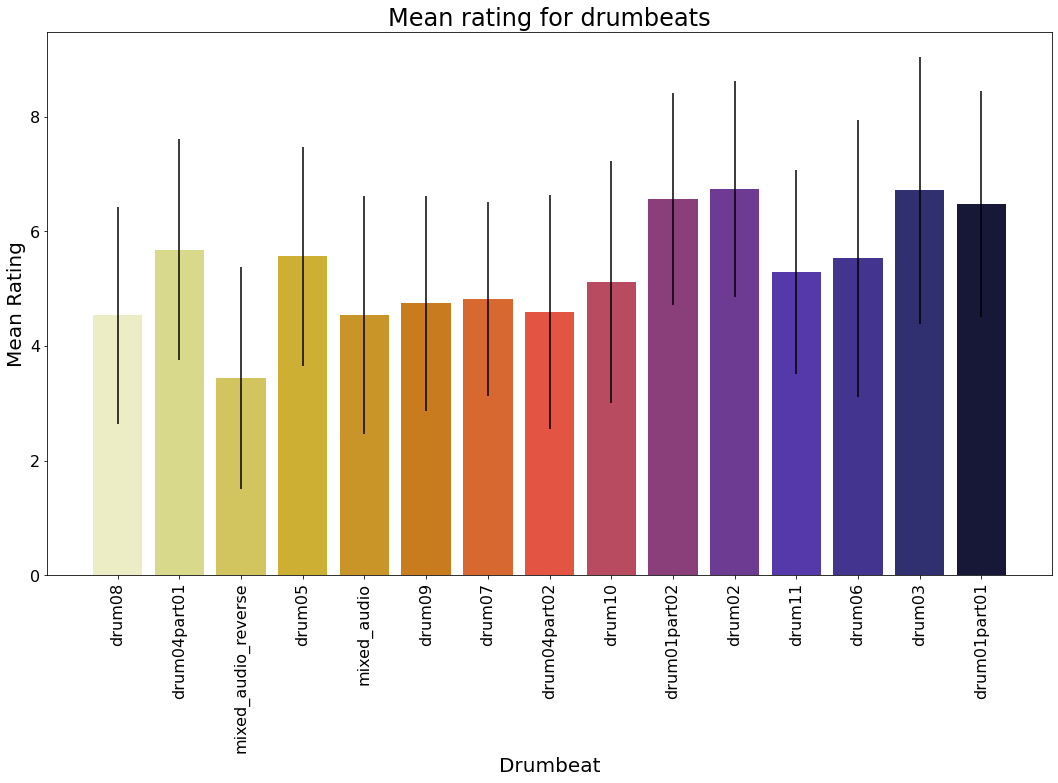

In [13]:
plt.figure(figsize=(18, 10))
ax = sns.barplot(x="Drumbeat",y="MeanRating", data=beat_rating_df, palette='CMRmap_r')
x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=beat_rating_df["StandardDeviation"], fmt="none", c="k")
plt.title("Mean rating for drumbeats", fontsize=24)
plt.xlabel('Drumbeat', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90)
plt.show()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


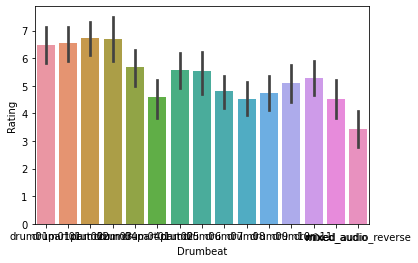

In [42]:
df = sns.load_dataset("penguins")
sns.barplot(data=all_rating_df, x="Drumbeat", y="Rating")
df

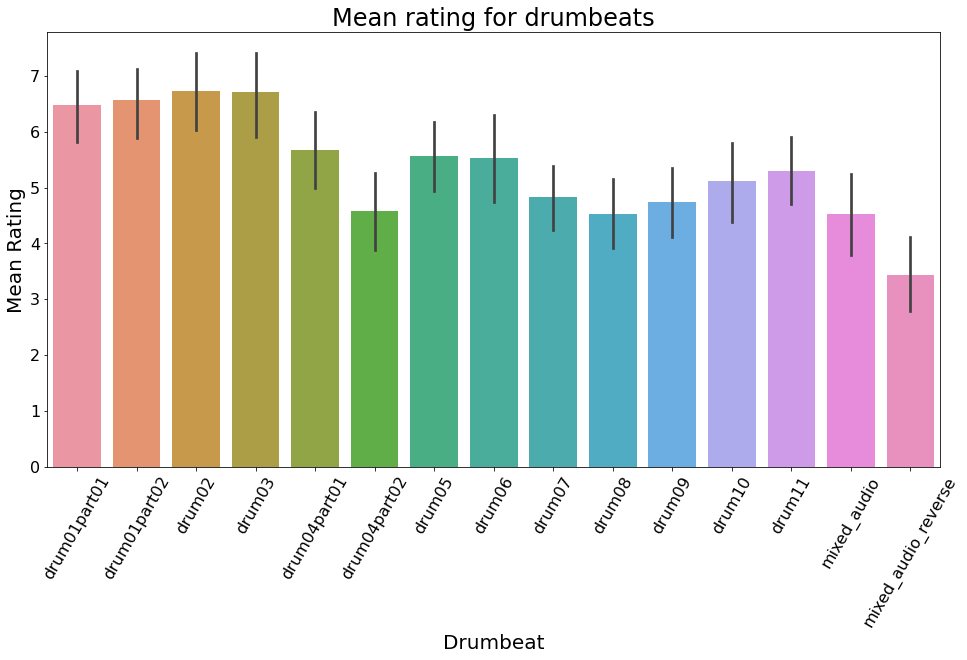

In [46]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/")
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=all_rating_df, x="Drumbeat",y="Rating")
plt.title("Mean rating for drumbeats", fontsize=24)
plt.xlabel('Drumbeat', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=60)
plt.savefig("songvsrating.png")
plt.show()

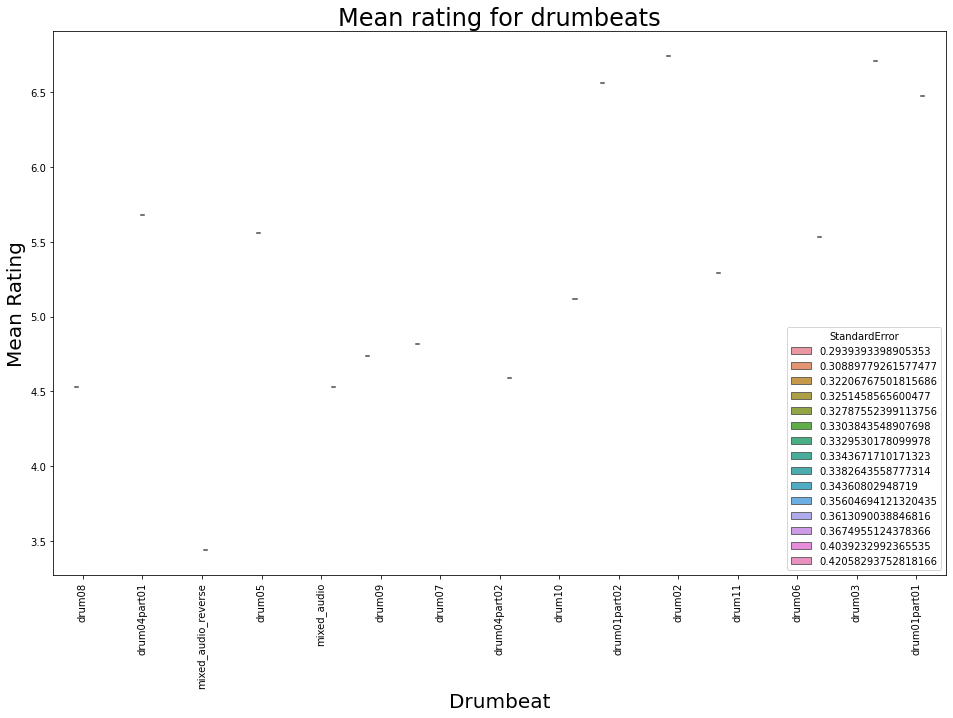

In [22]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=beat_rating_df, x="Drumbeat", y="MeanRating", hue="StandardError")
plt.title("Mean rating for drumbeats", fontsize=24)
plt.xlabel('Drumbeat', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.xticks(rotation=90)
plt.show()

In [110]:
plt.savefig('/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/Neuroscience Informatics/rating-vs-beat.png')

<Figure size 432x288 with 0 Axes>

AttributeError: 'Rectangle' object has no property 'errorbar'

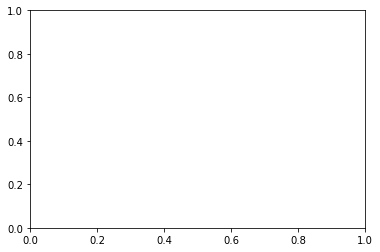

In [30]:
sns.barplot(data=beat_rating_df, , errorbar="sd")

In [9]:
np.array(list(rating_std_dict.values())).shape

(15, 34)

In [13]:
os.getcwd()

'/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp'

In [23]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/")
plt.scatter(np.array(list(rating_std_dict.values())))
plt.boxplot(np.array(list(rating_std_dict.values())).T)
plt.ylabel("Rating")
plt.xlabel("Song")
# plt.xticks(beat)
# plt.savefig("songvsrating.png")
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

In [24]:
all_tempos, all_ratings = [], []
idx = 0
for beat in tempos["Name"]:
    for p in range(34):
        all_tempos.append(tempos["Tempo"][idx])
        all_ratings.append(rating_std_dict[beat][p])
    idx += 1
len(all_tempos), len(all_ratings)

(510, 510)

In [25]:
# Confusion matrix for tempo and rating
conf_matrix = {}
for beat in tempos["Name"]:
    for p in range(34):
        if beat not in conf_matrix:
            conf_matrix[beat] = [rating_std_dict[beat][p]]
        else:
            pass
            conf_matrix[beat].append(rating_std_dict[beat][p])

len(conf_matrix["drum08"])

34

In [26]:
np.array(list(conf_matrix.values())).shape

(15, 34)

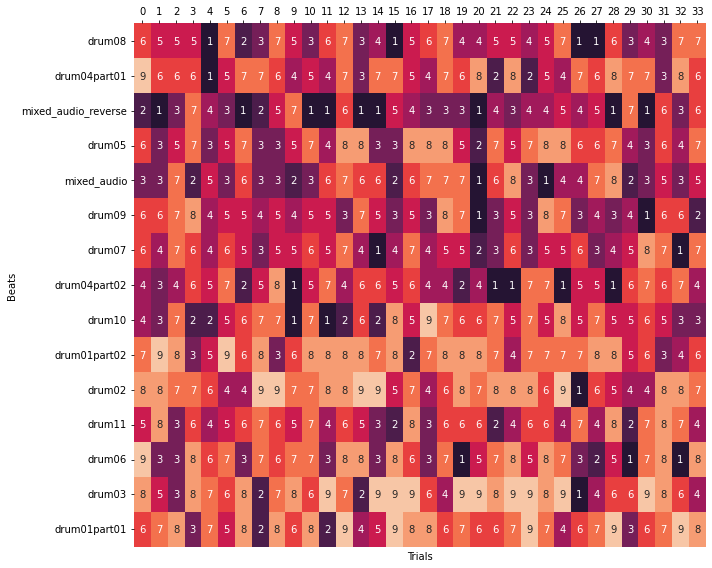

In [27]:
plt.figure(figsize = (10,8))
hm1 = sns.heatmap(np.array(list(conf_matrix.values())), annot=True, cbar=False, vmin=0, vmax=10,fmt='g')

hm1.set(title='', ylabel='Beats', xlabel="Trials")
hm1.xaxis.tick_top()

# hm1.set_xticklabels([int(i.get_text())+1 for i in hm1.get_xticklabels()])
hm1.set_yticklabels(conf_matrix.keys(), rotation="0")

plt.tight_layout()

In [33]:
# Confusion matrix for tempo and rating and violin plot
conf_matrix = {}
for beat in tempos["Name"]:
    for p in range(34):
        if beat not in conf_matrix:
            conf_matrix[beat] = [rating_std_dict[beat][p]]
        else:
            conf_matrix[beat].append(rating_std_dict[beat][p])

conf_matrix

{'drum08': [6,
  5,
  5,
  5,
  1,
  7,
  2,
  3,
  7,
  5,
  3,
  6,
  7,
  3,
  4,
  1,
  5,
  6,
  7,
  4,
  4,
  5,
  5,
  4,
  5,
  7,
  1,
  1,
  6,
  3,
  4,
  3,
  7,
  7],
 'drum04part01': [9,
  6,
  6,
  6,
  1,
  5,
  7,
  7,
  6,
  4,
  5,
  4,
  7,
  3,
  7,
  7,
  5,
  4,
  7,
  6,
  8,
  2,
  8,
  2,
  5,
  4,
  7,
  6,
  8,
  7,
  7,
  3,
  8,
  6],
 'mixed_audio_reverse': [2,
  1,
  3,
  7,
  4,
  3,
  1,
  2,
  5,
  7,
  1,
  1,
  6,
  1,
  1,
  5,
  4,
  3,
  3,
  3,
  1,
  4,
  3,
  4,
  4,
  5,
  4,
  5,
  1,
  7,
  1,
  6,
  3,
  6],
 'drum05': [6,
  3,
  5,
  7,
  3,
  5,
  7,
  3,
  3,
  5,
  7,
  4,
  8,
  8,
  3,
  3,
  8,
  8,
  8,
  5,
  2,
  7,
  5,
  7,
  8,
  8,
  6,
  6,
  7,
  4,
  3,
  6,
  4,
  7],
 'mixed_audio': [3,
  3,
  7,
  2,
  5,
  3,
  6,
  3,
  3,
  2,
  3,
  6,
  7,
  6,
  6,
  2,
  6,
  7,
  7,
  7,
  1,
  6,
  8,
  3,
  1,
  4,
  4,
  7,
  8,
  2,
  3,
  5,
  3,
  5],
 'drum09': [6,
  6,
  7,
  8,
  4,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
 

In [30]:
plot_df = pd.DataFrame(conf_matrix)
plot_df

,drum08,drum04part01,mixed_audio_reverse,drum05,mixed_audio,drum09,drum07,drum04part02,drum10,drum01part02,drum02,drum11,drum06,drum03,drum01part01
0,6,9,2,6,3,6,6,4,4,7,8,5,9,8,6
1,5,6,1,3,3,6,4,3,3,9,8,8,3,5,7
2,5,6,3,5,7,7,7,4,7,8,7,3,3,3,8
3,5,6,7,7,2,8,6,6,2,3,7,6,8,8,3
4,1,1,4,3,5,4,4,5,2,5,6,4,6,7,7
5,7,5,3,5,3,5,6,7,5,9,4,5,7,6,5
6,2,7,1,7,6,5,5,2,6,6,4,6,3,8,8
7,3,7,2,3,3,4,3,5,7,8,9,7,7,2,2
8,7,6,5,3,3,5,5,8,7,3,9,6,6,7,8
9,5,4,7,5,2,4,5,1,1,6,7,5,7,8,6


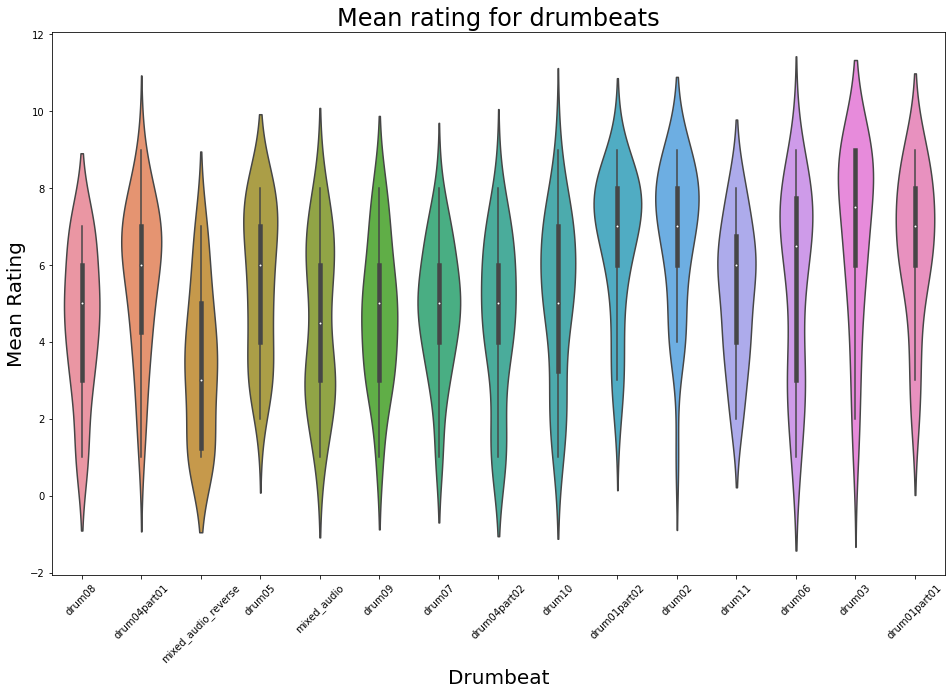

In [41]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=plot_df)
plt.title("Mean rating for drumbeats", fontsize=24)
plt.xlabel('Drumbeat', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.xticks(rotation=45)
plt.savefig('/mnt/sda1/shivam/DrummingEEG/FullStudyData/images/Neuroscience Informatics/rating-vs-beat-violinplot.png')
plt.show()

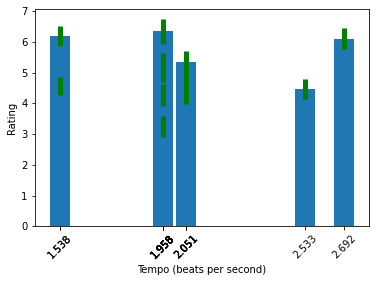

In [19]:
plt.bar(tempo, rating_mean, yerr=rating_sem, width=0.08, error_kw={"elinewidth": 5, "ecolor": "green"})
plt.ylabel("Rating")
plt.xlabel("Tempo (beats per second)")
plt.xticks(tempo, rotation="45")
plt.show()

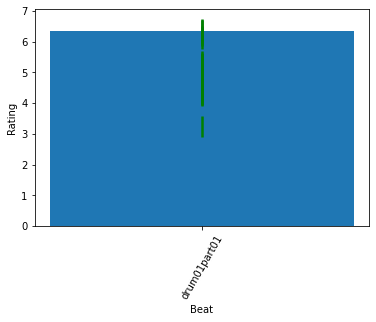

In [20]:
plt.bar(beat, rating_mean, width=0.51, yerr=rating_sem, error_kw={"elinewidth": 2.5, "ecolor": "green"})
plt.ylabel("Rating")
plt.xlabel("Beat")
plt.xticks(rotation="60")
plt.show()

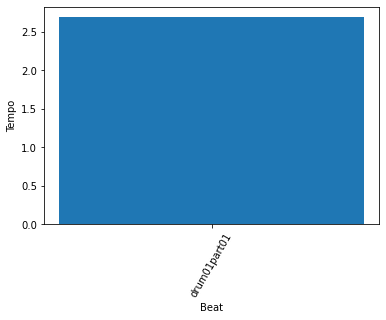

In [21]:
plt.bar(beat, tempo, width=0.51)
plt.ylabel("Tempo")
plt.xlabel("Beat")
plt.xticks(rotation="60")
plt.show()

In [216]:
# Finding the average ratings of each song
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
rating_dict = {}
exclusions = {"mix": "mixed_audio", "mix-rev": "mixed_audio_reverse"}
rating_std_dict = {}
for eeg in processed:
    fname = eeg.split("_")[1]
    rating = int(eeg.split("_")[3][:-4])
    if fname in exclusions:
        rating_dict[exclusions[fname]] = (rating_dict[exclusions[fname]] + rating) if exclusions[fname] in rating_dict else rating
        rating_std_dict[exclusions[fname]] = rating_std_dict[exclusions[fname]] + [rating] if exclusions[fname] in rating_std_dict else [rating]        
    else:
        rating_dict[fname] = (rating_dict[fname] + rating) if fname in rating_dict else rating
        rating_std_dict[fname] = rating_std_dict[fname] + [rating] if fname in rating_std_dict else [rating]
rating_dict, rating_std_dict


{'drum06': [9,
  3,
  3,
  8,
  6,
  7,
  3,
  7,
  6,
  7,
  7,
  3,
  8,
  8,
  3,
  8,
  6,
  3,
  7,
  1,
  5,
  7,
  8,
  5,
  8,
  7,
  3,
  2,
  5,
  1,
  7,
  8,
  1,
  8],
 'mixed_audio_reverse': [2,
  1,
  3,
  7,
  4,
  3,
  1,
  2,
  5,
  7,
  1,
  1,
  6,
  1,
  1,
  5,
  4,
  3,
  3,
  3,
  1,
  4,
  3,
  4,
  4,
  5,
  4,
  5,
  1,
  7,
  1,
  6,
  3,
  6],
 'drum07': [6,
  4,
  7,
  6,
  4,
  6,
  5,
  3,
  5,
  5,
  6,
  5,
  7,
  4,
  1,
  4,
  7,
  4,
  5,
  5,
  2,
  3,
  6,
  3,
  5,
  5,
  6,
  3,
  4,
  5,
  8,
  7,
  1,
  7],
 'drum01part01': [6,
  7,
  8,
  3,
  7,
  5,
  8,
  2,
  8,
  6,
  8,
  2,
  9,
  4,
  5,
  9,
  8,
  8,
  6,
  7,
  6,
  6,
  7,
  9,
  7,
  4,
  6,
  7,
  9,
  3,
  6,
  7,
  9,
  8],
 'drum05': [6,
  3,
  5,
  7,
  3,
  5,
  7,
  3,
  3,
  5,
  7,
  4,
  8,
  8,
  3,
  3,
  8,
  8,
  8,
  5,
  2,
  7,
  5,
  7,
  8,
  8,
  6,
  6,
  7,
  4,
  3,
  6,
  4,
  7],
 'drum01part02': [7,
  9,
  8,
  3,
  5,
  9,
  6,
  8,
  3,
  6,
  8,
  8,


In [228]:
# Finding participant-wise rating for each song
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
prate_dict = {}
for eeg in processed:
    pname = eeg.split("_")[0]
    for ndrum in range(34):
        if pname in eeg:
            rating = int(eeg.split("_")[3][:-4])
            dname = eeg.split("_")[1]
            if pname not in prate_dict:
                prate_dict[pname] = {}
                if dname not in prate_dict[pname]: 
                    prate_dict[pname] = {dname: [rating]}
                else:
                    prate_dict[pname][dname] += [rating]
            else:
                if dname not in prate_dict[pname]: 
                    prate_dict[pname] = {dname: [rating]}
                else:
                    prate_dict[pname][dname] += [rating]
                
#     print(pname, dname, rating)
    
prate_dict

{'Drum10': {'drum09': [6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6,
   6]},
 'Drum04': {'drum09': [2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2]},
 'Drum14': {'drum05': [7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7,
   7]},
 'Drum15': {'drum10': [3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3]},
 'Drum13': {'drum08': [3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3,
   3

In [91]:
# Finding participant-wise rating for each song
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
prate_dict = {}
idx = 0
for eeg in processed:
    pname = eeg.split("_")[0]
    dname = eeg.split("_")[1]
    rating = int(eeg.split("_")[3][:-4])
    
    if pname not in prate_dict:
        prate_dict[pname] = {dname: [rating]}
    else:
        if dname not in prate_dict[pname]:
            prate_dict[pname][dname] = [rating]
        else:
            prate_dict[pname][dname] += [rating]            


prate_dict

{'Drum10': {'drum06': [9, 8],
  'mix-rev': [1, 1],
  'drum11': [6, 3],
  'mix': [3, 7],
  'drum01part02': [9, 8],
  'drum05': [7, 8],
  'drum08': [2, 3],
  'drum02': [9, 9],
  'drum01part01': [5, 4],
  'drum10': [6, 5],
  'drum07': [1, 4],
  'drum04part02': [1, 1],
  'drum09': [5, 6],
  'drum04part01': [5, 3],
  'drum03': [6, 8]},
 'Drum04': {'mix-rev': [2, 5],
  'drum02': [8, 9],
  'drum01part01': [3, 8],
  'drum04part01': [6, 8],
  'drum08': [7, 5],
  'drum06': [7, 7],
  'mix': [5, 7],
  'drum07': [6, 7],
  'drum10': [7, 7],
  'drum05': [8, 5],
  'drum04part02': [6, 6],
  'drum09': [7, 2],
  'drum03': [9, 9],
  'drum01part02': [4, 7],
  'drum11': [7, 8]},
 'Drum14': {'drum07': [6, 5],
  'drum06': [3, 3],
  'drum01part01': [7, 7],
  'drum05': [5, 7],
  'drum04part02': [5, 5],
  'mix': [2, 3],
  'drum02': [4, 7],
  'drum09': [5, 8],
  'mix-rev': [1, 1],
  'drum08': [3, 7],
  'drum11': [5, 4],
  'drum04part01': [4, 6],
  'drum03': [9, 1],
  'drum10': [7, 5],
  'drum01part02': [8, 3]},
 

In [92]:
df = pd.DataFrame(prate_dict)
df

,Drum10,Drum04,Drum14,Drum15,Drum13,Drum12,Drum03,Drum05,Drum09,Drum07,Drum08,Drum02,Drum01,Drum06,Drum11,Subj4,Subj2
drum06,"[9, 8]","[7, 7]","[3, 3]","[3, 1]","[3, 5]","[7, 8]","[1, 1]","[3, 7]","[7, 5]","[3, 5]","[6, 7]","[8, 2]","[8, 6]","[3, 8]","[8, 8]","[6, 8]","[7, 7]"
mix-rev,"[1, 1]","[2, 5]","[1, 1]","[1, 1]","[3, 4]","[7, 6]","[3, 3]","[3, 7]","[7, 4]","[5, 3]","[5, 3]","[2, 1]","[4, 5]","[4, 4]","[6, 3]","[1, 1]","[4, 6]"
drum11,"[6, 3]","[7, 8]","[5, 4]","[5, 4]","[3, 2]","[8, 8]","[4, 2]","[4, 7]","[7, 8]","[6, 6]","[6, 6]","[4, 5]","[7, 6]","[5, 6]","[6, 2]","[3, 4]","[6, 7]"
mix,"[3, 7]","[5, 7]","[2, 3]","[2, 3]","[7, 7]","[7, 8]","[3, 3]","[3, 6]","[6, 5]","[2, 4]","[6, 6]","[1, 1]","[6, 5]","[3, 2]","[8, 4]","[3, 3]","[6, 7]"
drum01part02,"[9, 8]","[4, 7]","[8, 3]","[5, 3]","[6, 8]","[7, 7]","[9, 8]","[8, 8]","[3, 2]","[7, 5]","[8, 7]","[6, 6]","[8, 7]","[8, 7]","[8, 7]","[6, 4]","[8, 8]"
drum05,"[7, 8]","[8, 5]","[5, 7]","[3, 3]","[6, 4]","[7, 8]","[3, 8]","[7, 4]","[8, 6]","[3, 5]","[7, 7]","[3, 5]","[8, 6]","[4, 5]","[7, 3]","[3, 2]","[8, 6]"
drum08,"[2, 3]","[7, 5]","[3, 7]","[5, 4]","[3, 3]","[7, 7]","[3, 1]","[7, 7]","[5, 4]","[6, 6]","[5, 5]","[5, 4]","[5, 6]","[4, 5]","[1, 4]","[1, 1]","[7, 6]"
drum02,"[9, 9]","[8, 9]","[4, 7]","[5, 6]","[8, 4]","[7, 7]","[9, 1]","[5, 4]","[4, 4]","[7, 7]","[7, 8]","[7, 8]","[8, 8]","[8, 6]","[8, 8]","[6, 6]","[9, 8]"
drum01part01,"[5, 4]","[3, 8]","[7, 7]","[6, 5]","[2, 4]","[7, 8]","[9, 9]","[9, 6]","[2, 3]","[8, 6]","[6, 7]","[8, 6]","[8, 7]","[8, 8]","[7, 7]","[6, 6]","[9, 9]"
drum10,"[6, 5]","[7, 7]","[7, 5]","[3, 3]","[2, 1]","[8, 9]","[1, 3]","[6, 5]","[7, 7]","[5, 6]","[5, 5]","[4, 5]","[7, 7]","[7, 8]","[2, 5]","[2, 2]","[6, 6]"


In [93]:
mean_rating = []
sem_rating = []
for row in df.itertuples():
    row_mean = []
    row_sem = []
    for col in row:
        if type(col).__name__ == 'list':
            row_mean.append(np.mean(col))
            row_sem.append(sem(col))
    mean_rating.append(np.array(row_mean))
    sem_rating.append(np.array(row_sem))


mean_rating = pd.DataFrame(np.array(mean_rating))
sem_rating = pd.DataFrame(np.array(sem_rating))

mean_rating.shape, sem_rating.shape

((15, 17), (15, 17))

In [94]:
mean_rating

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,8.5,7.0,3.0,2.0,4.0,7.5,1.0,5.0,6.0,4.0,6.5,5.0,7.0,5.5,8.0,7.0,7.0
1,1.0,3.5,1.0,1.0,3.5,6.5,3.0,5.0,5.5,4.0,4.0,1.5,4.5,4.0,4.5,1.0,5.0
2,4.5,7.5,4.5,4.5,2.5,8.0,3.0,5.5,7.5,6.0,6.0,4.5,6.5,5.5,4.0,3.5,6.5
3,5.0,6.0,2.5,2.5,7.0,7.5,3.0,4.5,5.5,3.0,6.0,1.0,5.5,2.5,6.0,3.0,6.5
4,8.5,5.5,5.5,4.0,7.0,7.0,8.5,8.0,2.5,6.0,7.5,6.0,7.5,7.5,7.5,5.0,8.0
5,7.5,6.5,6.0,3.0,5.0,7.5,5.5,5.5,7.0,4.0,7.0,4.0,7.0,4.5,5.0,2.5,7.0
6,2.5,6.0,5.0,4.5,3.0,7.0,2.0,7.0,4.5,6.0,5.0,4.5,5.5,4.5,2.5,1.0,6.5
7,9.0,8.5,5.5,5.5,6.0,7.0,5.0,4.5,4.0,7.0,7.5,7.5,8.0,7.0,8.0,6.0,8.5
8,4.5,5.5,7.0,5.5,3.0,7.5,9.0,7.5,2.5,7.0,6.5,7.0,7.5,8.0,7.0,6.0,9.0
9,5.5,7.0,6.0,3.0,1.5,8.5,2.0,5.5,7.0,5.5,5.0,4.5,7.0,7.5,3.5,2.0,6.0


In [22]:
# mean_rating.to_csv("mean_rating.csv")


In [95]:
os.getcwd()

'/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp'

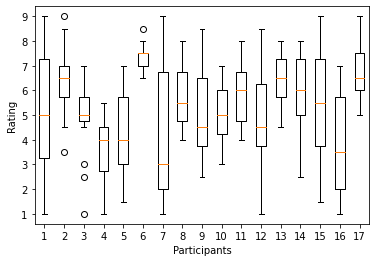

In [96]:
# plt.scatter(mean_rating, list(range(1, 17)))
plt.boxplot(mean_rating)
plt.xlabel("Participants")
plt.ylabel("Rating")
# plt.xticks(range(17))
plt.show()

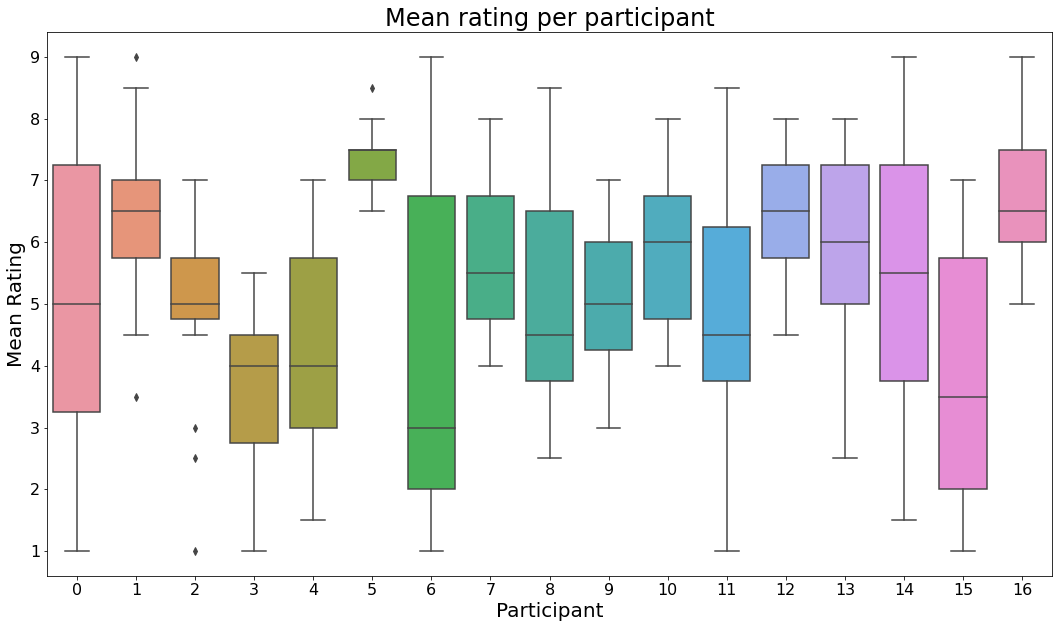

In [108]:
plt.figure(figsize=(18, 10))
ax = sns.boxplot(data=mean_rating)
plt.title("Mean rating per participant", fontsize=24)
plt.xlabel('Participant', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

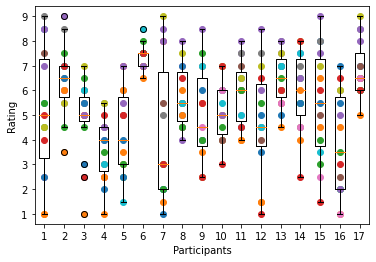

In [55]:
for row in mean_rating.itertuples():
    plt.scatter(list(range(1, 18)), np.array(row[1:]).T)

plt.boxplot(mean_rating)
plt.xlabel("Participants")
plt.ylabel("Rating")
plt.show()

In [3]:
stimInfo = pd.read_csv("/mnt/sda1/shivam/DrummingEEG/StimuliInfo.csv")
stimInfo

,Stimuli,Tempo,Base,MeanRating
0,drum01part1,3Hz,Complex A,6.47
1,drum01part02,3Hz,Complex A,6.56
2,drum02,4Hz,Complex A,6.74
3,drum03,8Hz,Complex A,6.71
4,drum04part01,3Hz,Complex B,5.68
5,drum04part02,3Hz,Complex B,4.82
6,drum05,4Hz,Complex B,5.56
7,drum06,8Hz,Complex B,5.53
8,drum07,3Hz,Simple A,4.82
9,drum08,4Hz,Simple A,4.53


In [21]:
base_rate_dict = {}
base_rate_dict_vals = {}
base_rate_dict_ctr = {}
base_rate = ["Complex A", "Complex B", "Simple A"]
for i in stimInfo.itertuples():
    key = i[3]
    if key in base_rate_dict.keys():
        base_rate_dict[key] += i[4]
        base_rate_dict_vals[key] += [i[4]]
        base_rate_dict_ctr[key] += 1
    else:
        base_rate_dict[key] = i[4]
        base_rate_dict_vals[key] = [i[4]]
        base_rate_dict_ctr[key] = 1

base_rate_dict, base_rate_dict_vals, base_rate_dict_ctr

({'Complex A': 26.48, 'Complex B': 21.59, 'Simple A': 24.5},
 {'Complex A': [6.47, 6.56, 6.74, 6.71],
  'Complex B': [5.68, 4.82, 5.56, 5.53],
  'Simple A': [4.82, 4.53, 4.74, 5.12, 5.29]},
 {'Complex A': 4, 'Complex B': 4, 'Simple A': 5})

In [5]:
base_rate_dict_avg = {}
for key in base_rate_dict.keys():
    base_rate_dict_avg[key] = base_rate_dict[key] / base_rate_dict_ctr[key]
base_rate_dict_avg

{'Complex A': 6.62, 'Complex B': 5.3975, 'Simple A': 4.9}

In [24]:
from scipy.stats import sem
er_std = [sem(x) for x in base_rate_dict_vals.values()]
er_std

[0.06363961030678938, 0.19520822216289957, 0.13590437814875572]

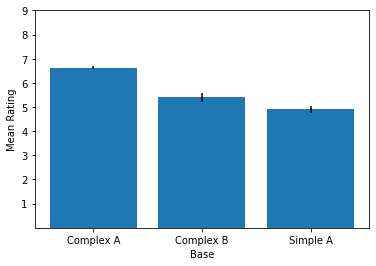

In [25]:
plt.bar(base_rate_dict_avg.keys(), base_rate_dict_avg.values(), yerr=er_std)
# plt.bar(tempo, rating_mean, yerr=rating_sem, width=0.08, error_kw={"elinewidth": 5, "ecolor": "green"})
plt.xlabel("Base")
plt.ylabel("Mean Rating")
plt.yticks(range(1, 10))
plt.show()

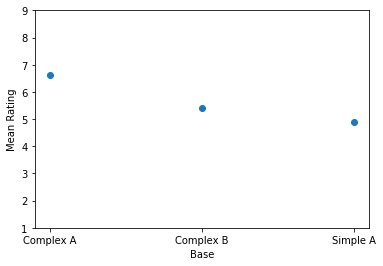

In [29]:
plt.scatter(base_rate_dict_avg.keys(),base_rate_dict_avg.values())
plt.xlabel("Base")
plt.ylabel("Mean Rating")
plt.yticks(range(1, 10))
plt.show()

In [26]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
# reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])


reg.coef_

array([0.5, 0.5])

In [7]:
tempo_rate_dict = {}
tempo_rate_dict_ctr = {}
for i in stimInfo.itertuples():
    key = i[2]
    if key in tempo_rate_dict.keys():
        tempo_rate_dict[key] += i[4]
        tempo_rate_dict_ctr[key] += 1
    else:
        tempo_rate_dict[key] = i[4]
        tempo_rate_dict_ctr[key] = 1

tempo_rate_dict, tempo_rate_dict_ctr

({'3Hz': 28.35,
  '4Hz': 16.830000000000002,
  '8Hz': 17.53,
  '5Hz': 4.74,
  '6Hz': 5.12},
 {'3Hz': 5, '4Hz': 3, '8Hz': 3, '5Hz': 1, '6Hz': 1})

In [8]:
tempo_rate_dict_avg = {}
for key in tempo_rate_dict.keys():
    tempo_rate_dict_avg[key] = round(tempo_rate_dict[key] / tempo_rate_dict_ctr[key], 2)
tempo_rate_dict_avg

{'3Hz': 5.67, '4Hz': 5.61, '8Hz': 5.84, '5Hz': 4.74, '6Hz': 5.12}

In [15]:
def dict_reorder(item):
    return {k: dict_reoder(v) if isinstance(v, dict) else v for k, v in sorted(item.items())}

tempo_rate_dict_avg_reord = dict_reorder(tempo_rate_dict_avg)

In [16]:
tempo_rate_dict_avg_reord

{'3Hz': 5.67, '4Hz': 5.61, '5Hz': 4.74, '6Hz': 5.12, '8Hz': 5.84}

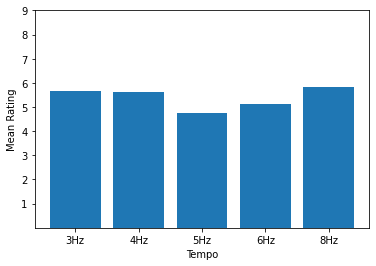

In [19]:
plt.bar(tempo_rate_dict_avg_reord.keys(), tempo_rate_dict_avg_reord.values())
plt.xlabel("Tempo")
plt.ylabel("Mean Rating")
plt.yticks(range(1, 10))
plt.show()

In [86]:
list(stimInfo.iloc[:, 1])

['3Hz',
 '3Hz',
 '4Hz',
 '8Hz',
 '3Hz',
 '3Hz',
 '4Hz',
 '8Hz',
 '3Hz',
 '4Hz',
 '5Hz',
 '6Hz',
 '8Hz']

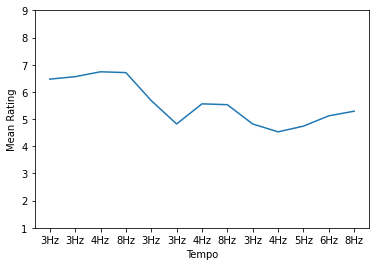

In [107]:
# plt.bar(list(stimInfo.iloc[:, 1]), list(stimInfo.iloc[:, 3]))
plt.plot(list(stimInfo.iloc[:, 3]))
plt.xlabel("Tempo")
plt.ylabel("Mean Rating")
plt.yticks(range(1, 10))
plt.xticks(range(len(list(stimInfo.iloc[:, 1]))), list(stimInfo.iloc[:, 1]))
plt.show()

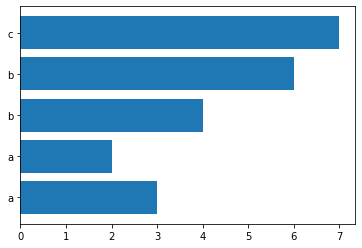

In [94]:
x = [3, 2, 4, 6, 7]
y = ['a','a','b','b','c']

import matplotlib.pyplot as plt
plt.barh(range(len(x)), x)
plt.yticks(range(len(x)), y)
plt.show()

# Regression

In [111]:
stimInfoN = pd.read_csv("/mnt/sda1/shivam/DrummingEEG/StimuliInfoNum.csv")
stimInfoN

,Stimuli,Tempo,BaseBeat,MeanRating
0,drum01part1,3,1,6.47
1,drum01part02,3,1,6.56
2,drum02,4,1,6.74
3,drum03,8,1,6.71
4,drum04part01,3,2,5.68
5,drum04part02,3,2,4.82
6,drum05,4,2,5.56
7,drum06,8,2,5.53
8,drum07,3,3,4.82
9,drum08,4,3,4.53


In [112]:
list(stimInfoN.iloc[:, 3])

[6.47, 6.56, 6.74, 6.71, 5.68, 4.82, 5.56, 5.53, 4.82, 4.53, 4.74, 5.12, 5.29]

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
X = np.array(list(stimInfoN.iloc[: , 2])).reshape(-1, 1)
y = np.array(list(stimInfoN.iloc[:, 3]))
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [115]:
reg.coef_, reg.intercept_

(array([-0.8475]), 7.3425)

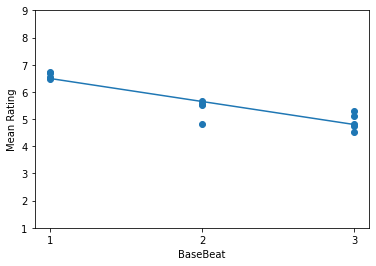

In [119]:
plt.scatter(list(stimInfoN.iloc[: , 2]), list(stimInfoN.iloc[:, 3]))
plt.xlabel("BaseBeat")
plt.ylabel("Mean Rating")
plt.plot(X, y_pred)
plt.yticks(range(1, 10))
plt.xticks([1, 2, 3])
plt.show()

<AxesSubplot:xlabel='BaseBeat', ylabel='MeanRating'>

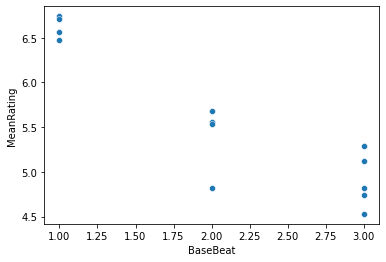

In [128]:
sns.scatterplot(data=stimInfoN, x="BaseBeat", y="MeanRating")

In [149]:
base_rate_pd = pd.DataFrame(data={"BaseBeat": np.reshape(X, 13), "MeanRating": y_pred}, index=list(range(len(X))))
base_rate_pd

,BaseBeat,MeanRating
0,1,6.4950
1,1,6.4950
2,1,6.4950
3,1,6.4950
4,2,5.6475
5,2,5.6475
6,2,5.6475
7,2,5.6475
8,3,4.8000
9,3,4.8000


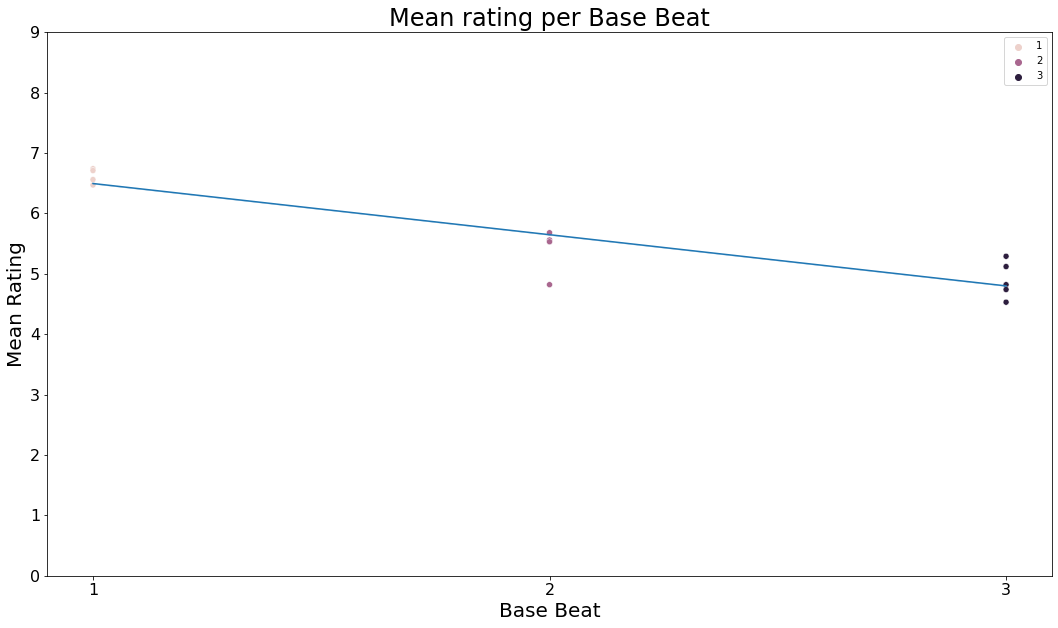

In [168]:
plt.figure(figsize=(18, 10))
# ax = sns.boxplot(data=mean_rating)
ax = sns.scatterplot(data=stimInfoN, x="BaseBeat", y="MeanRating", hue="BaseBeat")
ax = sns.lineplot(data=base_rate_pd, x="BaseBeat", y="MeanRating")
plt.title("Mean rating per Base Beat", fontsize=24)
plt.xlabel('Base Beat', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(list(range(10)))
plt.xticks(list(range(1, 4)))
plt.show()

In [169]:
X = np.array(list(stimInfoN.iloc[: , 1])).reshape(-1, 1)
y = np.array(list(stimInfoN.iloc[:, 3]))
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

In [170]:
reg.coef_, reg.intercept_

(array([0.01842508]), 5.4944342507645265)

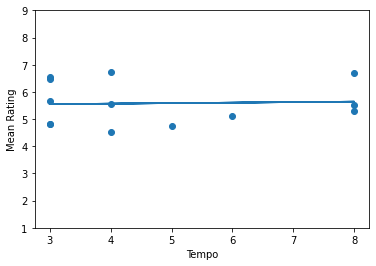

In [171]:
plt.scatter(list(stimInfoN.iloc[: , 1]), list(stimInfoN.iloc[:, 3]))
plt.xlabel("Tempo")
plt.ylabel("Mean Rating")
plt.plot(X, y_pred)
plt.yticks(range(1, 10))
plt.xticks(range(3, 9))
plt.show()

In [172]:
tempo_rate_pd = pd.DataFrame(data={"Tempo": np.reshape(X, 13), "MeanRating": y_pred}, index=list(range(len(X))))
tempo_rate_pd

,Tempo,MeanRating
0,3,5.549709
1,3,5.549709
2,4,5.568135
3,8,5.641835
4,3,5.549709
5,3,5.549709
6,4,5.568135
7,8,5.641835
8,3,5.549709
9,4,5.568135


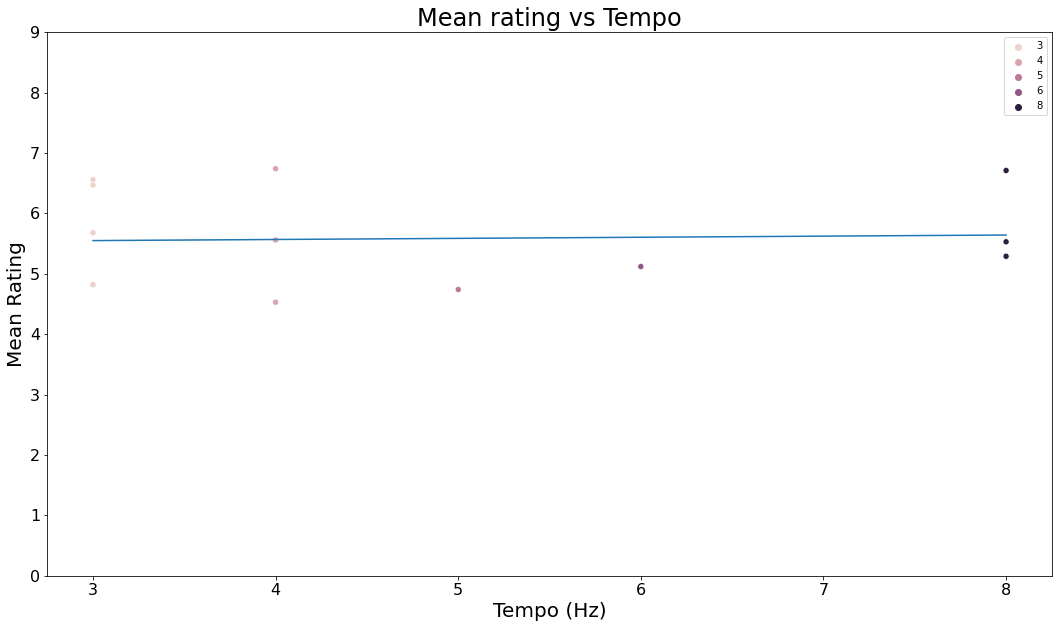

In [174]:
plt.figure(figsize=(18, 10))
# ax = sns.boxplot(data=mean_rating)
ax = sns.scatterplot(data=stimInfoN, x="Tempo", y="MeanRating", hue="Tempo")
ax = sns.lineplot(data=tempo_rate_pd, x="Tempo", y="MeanRating")
plt.title("Mean rating vs Tempo", fontsize=24)
plt.xlabel('Tempo (Hz)', fontsize=20);
plt.ylabel('Mean Rating', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(list(range(10)))
# plt.xticks(list(range(1, 4)))
plt.show()

# Spectrogram on eeg response and stimuli

In [56]:
from scipy.fftpack import fft, ifft
from scipy.io import wavfile, savemat
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.fft import fftshift

In [57]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/Stimuli")
stim_files = glob.glob("*.wav")
stim_files = [x[:-4] for x in glob.glob("*.wav")]
stim_files

['drum08',
 'drum04part01',
 'mixed_audio_reverse',
 'drum05',
 'mixed_audio',
 'drum09',
 'drum07',
 'drum04part02',
 'drum10',
 'drum01part02',
 'drum02',
 'drum11',
 'drum06',
 'drum03',
 'drum01part01']

In [83]:
stimInfo = pd.read_csv("/mnt/sda1/shivam/DrummingEEG/StimuliInfo.csv")
stimInfo

,Stimuli,Tempo,Base,MeanRating
0,drum01part01,3Hz,Complex A,6.47
1,drum01part02,3Hz,Complex A,6.56
2,drum02,4Hz,Complex A,6.74
3,drum03,8Hz,Complex A,6.71
4,drum04part01,3Hz,Complex B,5.68
5,drum04part02,3Hz,Complex B,4.82
6,drum05,4Hz,Complex B,5.56
7,drum06,8Hz,Complex B,5.53
8,drum07,3Hz,Simple A,4.82
9,drum08,4Hz,Simple A,4.53


In [85]:
for row in stimInfo.itertuples():
    print(row[1])
    eeg = all_song_eeg[row[1]]
    print(eeg.shape)

drum01part01
(30040,)
drum01part02
(30040,)
drum02
(30040,)
drum03
(30040,)
drum04part01
(30040,)
drum04part02
(30040,)
drum05
(30040,)
drum06
(30040,)
drum07
(30040,)
drum08
(30040,)
drum09
(30040,)
drum10
(30040,)
drum11
(30040,)


In [59]:
# Finding max len of EEG recordings
os.chdir("/mnt/sda1/shivam/DrummingEEG/FullStudyData/Preprocessed/temp")
processed = glob.glob("*.npy")
max_len = 0
for file in processed:
    data = np.load(file)
    max_len = data.shape[0] if data.shape[0] > max_len else max_len
#     print(data.shape)
max_len

30040

In [60]:
exclusions = {"mix": "mixed_audio", "mix-rev": "mixed_audio_reverse"}

In [61]:
all_song_eeg = {}
for i in range(15):
    song_eeg = [[0] * max_len]
    song_rating = 0
    for eeg in processed:
        if stim_files[i] in eeg or "mix" in eeg or "mix-rev" in eeg:
            # Take eeg data of 64 channels and average across channels, participants and trials
            data = np.load(eeg).T
            mean = np.mean(data, axis=0)
            song_eeg.append(list(mean) + [0] * (max_len - len(mean)))
        elif stim_files[i] in exclusions:
            if exclusions[stim_files[i]] in eeg:
                data = np.load(eeg).T
                mean = np.mean(data, axis=0)
                song_eeg.append(list(mean) + [0] * (max_len - len(mean)))

    song_eeg = song_eeg + [0] * (max_len - len(song_eeg[-1]))
    # all_song_eeg.append(np.mean(song_eeg, axis=0))
    all_song_eeg[stim_files[i]] = np.mean(song_eeg, axis=0)

In [63]:
all_song_eeg

{'drum08': array([-108.87657074, -112.20399246, -114.82613811, ...,  -30.23577303,
         -29.97449115,  -29.78984856]),
 'drum04part01': array([ -98.2559639 , -100.07164012, -101.79284126, ...,    0.        ,
           0.        ,    0.        ]),
 'mixed_audio_reverse': array([-122.19764828, -123.87583191, -125.93481598, ...,    0.        ,
           0.        ,    0.        ]),
 'drum05': array([-96.36071399, -94.78006017, -93.87951205, ...,   0.        ,
          0.        ,   0.        ]),
 'mixed_audio': array([-122.19764828, -123.87583191, -125.93481598, ...,    0.        ,
           0.        ,    0.        ]),
 'drum09': array([-97.28871767, -98.04605462, -98.94301449, ...,   0.        ,
          0.        ,   0.        ]),
 'drum07': array([-128.06321807, -127.46460992, -126.25361851, ...,    0.        ,
           0.        ,    0.        ]),
 'drum04part02': array([-222.83980563, -225.10318767, -226.08073241, ...,    0.        ,
           0.        ,    0.        ])

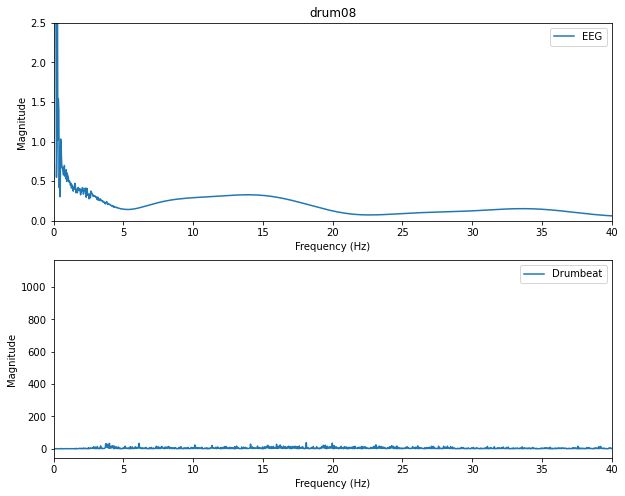

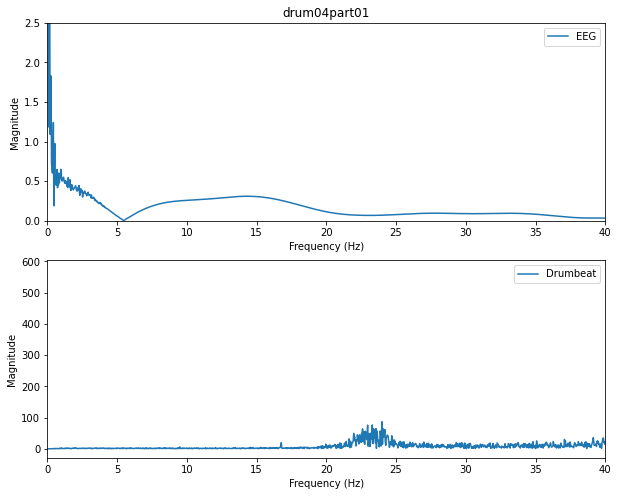

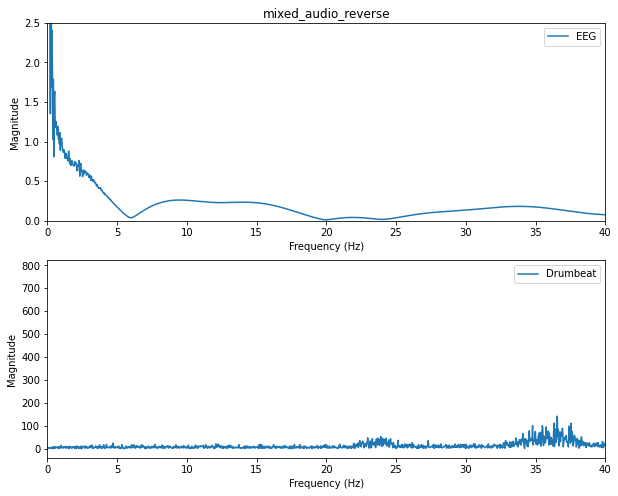

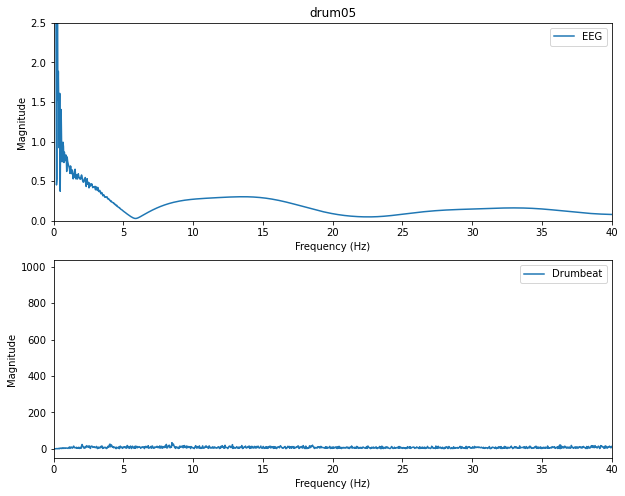

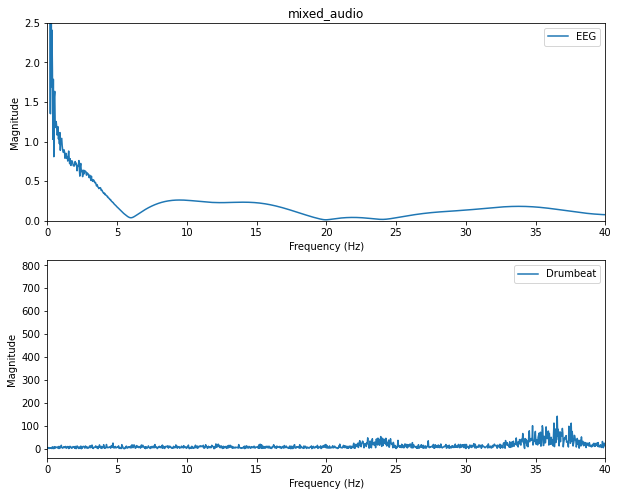

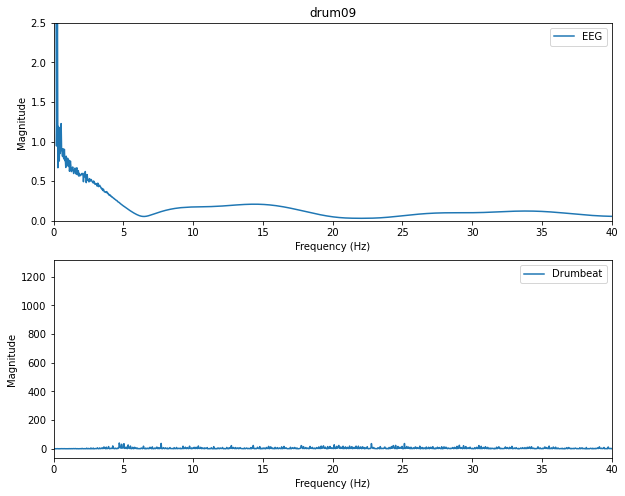

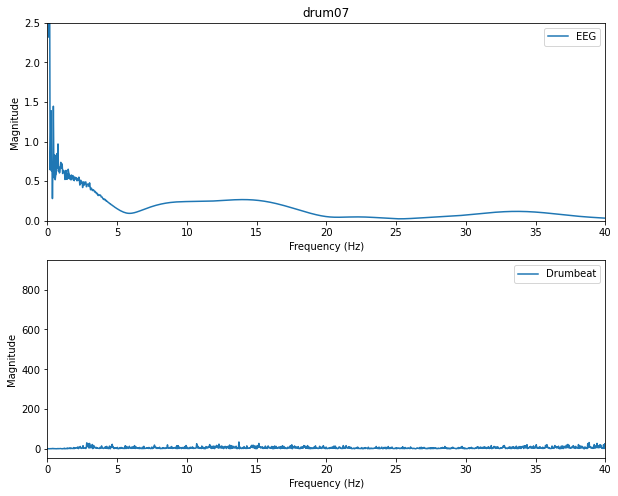

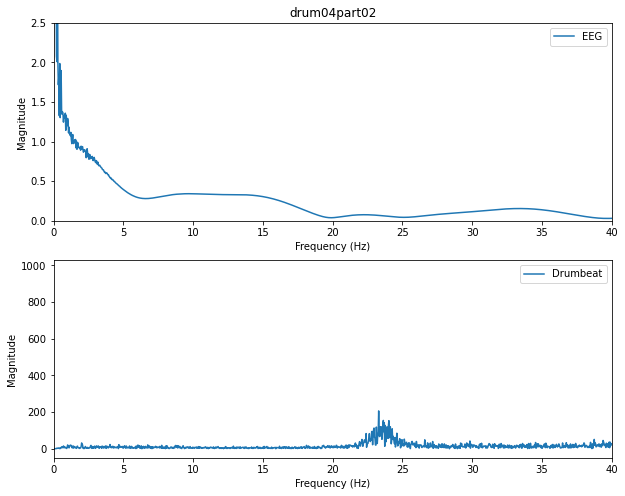

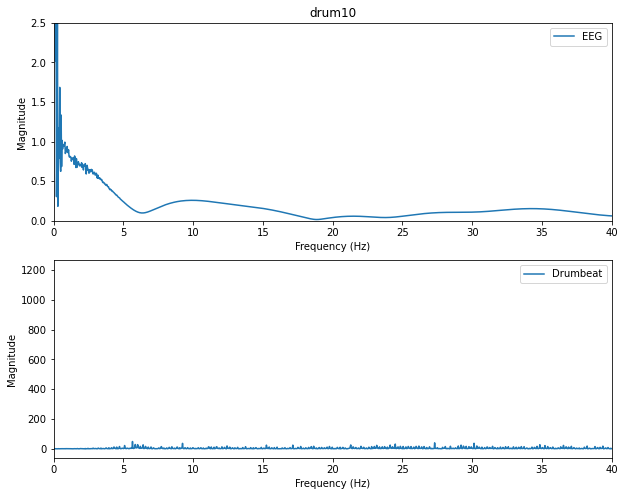

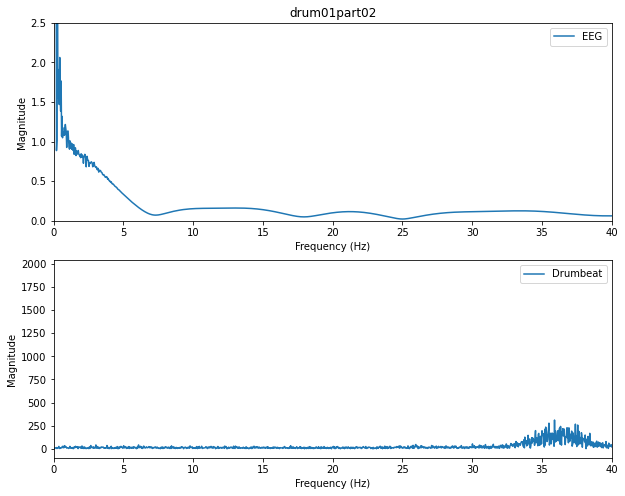

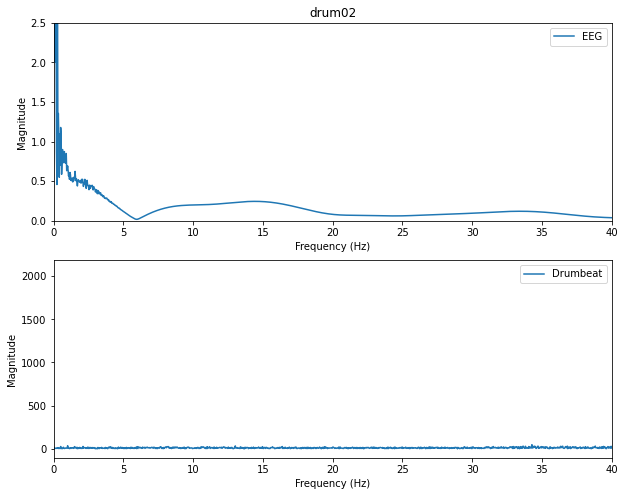

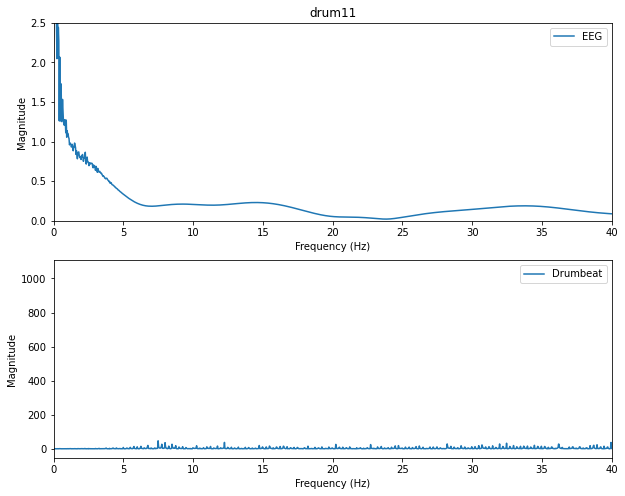

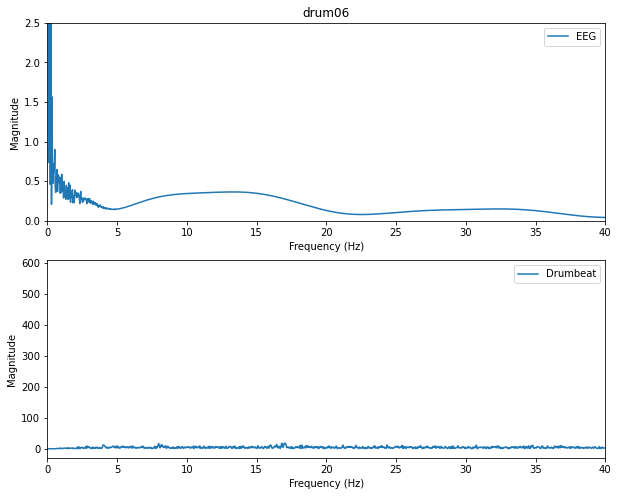

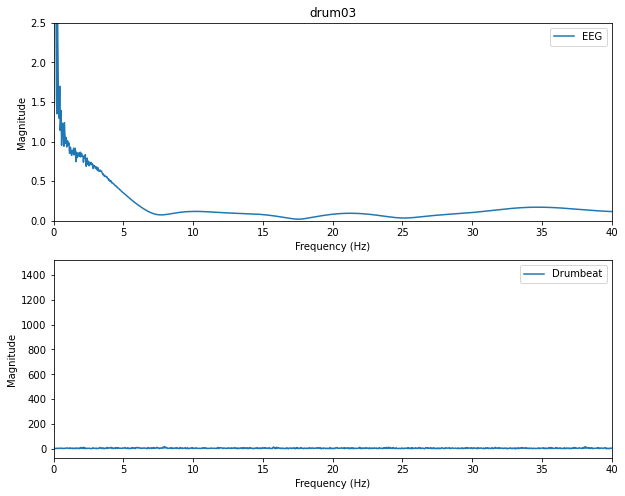

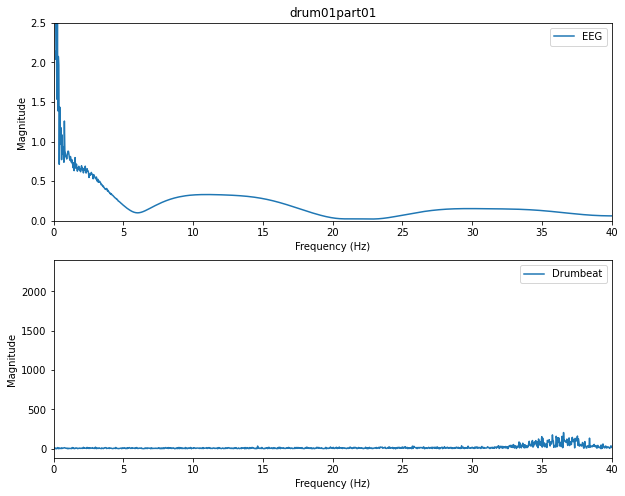

In [72]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/Stimuli")
for stim in stim_files:
    sampling_rate, samples = wavfile.read(stim + ".wav")
    try:
        mono_song = np.mean(samples, axis=1)
    except:
        mono_song = samples
    
    eeg_resp = all_song_eeg[stim]
#     print(mono_song.shape, eeg_resp.shape)
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
    
    N_s, N_e = len(mono_song), len(eeg_resp)
    
    yf_s, xf_s = fft(mono_song), fftfreq(N_s, 1./44100)[:N_s//2]
    
    yf_e, xf_e = fft(eeg_resp), fftfreq(N_e, 1./1000)[:N_e//2]
    
    # Plotting FFT of EEG Signals
    ax1.plot(xf_e, 2.0/N_e * np.abs(yf_e[0:N_e//2]), label="EEG")
    ax1.set_xlabel("Frequency (Hz)")
    ax1.set_ylabel("Magnitude")
    ax1.set_xlim(0, 40)
    ax1.set_ylim(0, 2.5)
    ax1.set_title(stim)
    ax1.legend()

    # Plotting FFT of Song
    ax2.plot(xf_s, 2.0/N_s * np.abs(yf_s[0:N_s//2]), label="Drumbeat")
    ax2.set_xlabel("Frequency (Hz)")
    ax2.set_ylabel("Magnitude")
    ax2.set_xlim(0, 40)
#     ax2.set_ylim(0, 2.5)
#     ax2.set_title(stim)
    ax2.legend()
    
    

(1324916,) (30040,)


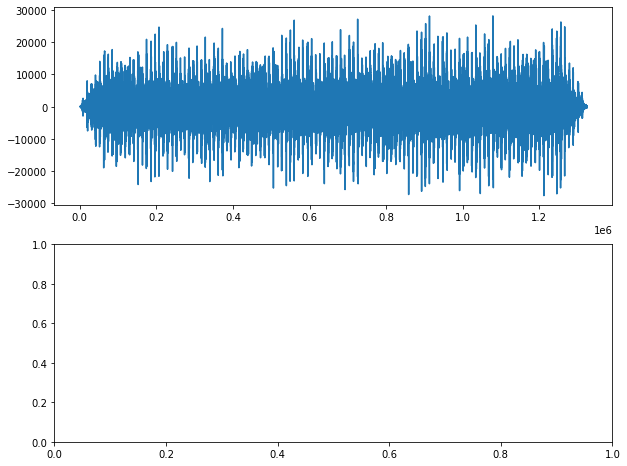

(1325222,) (30040,)


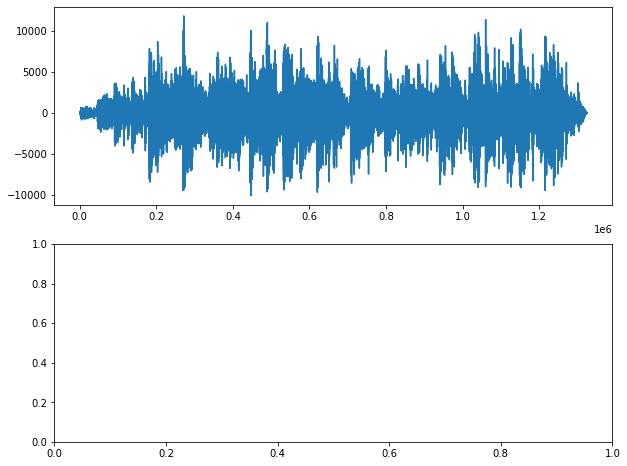

(1321098,) (30040,)


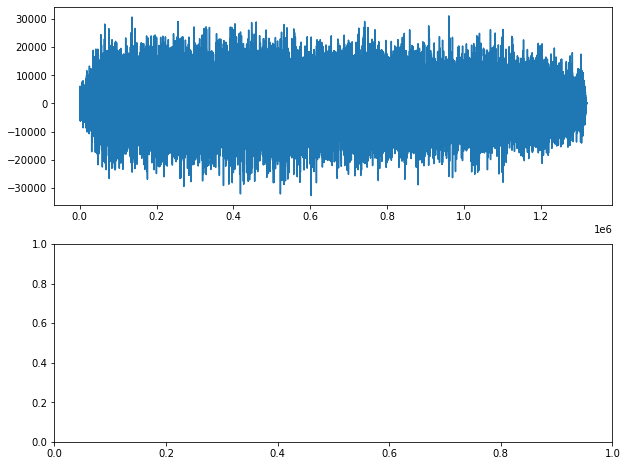

(1321582,) (30040,)


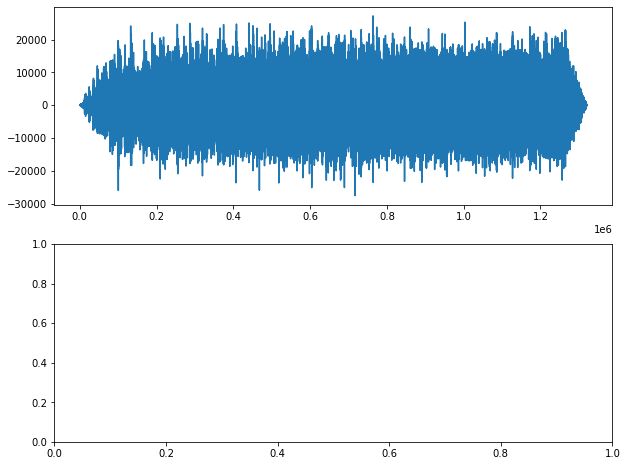

(1321098,) (30040,)


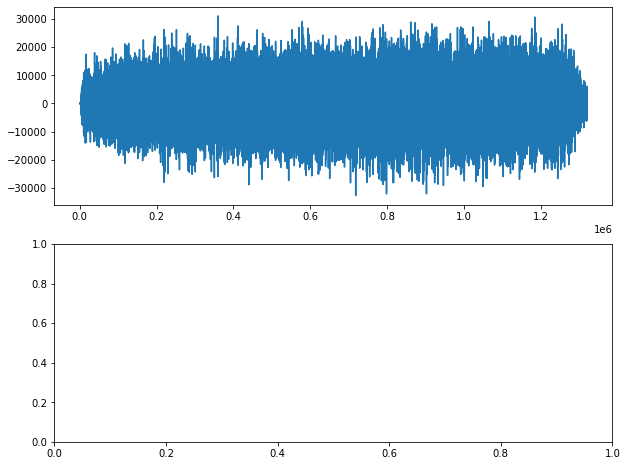

(1322445,) (30040,)


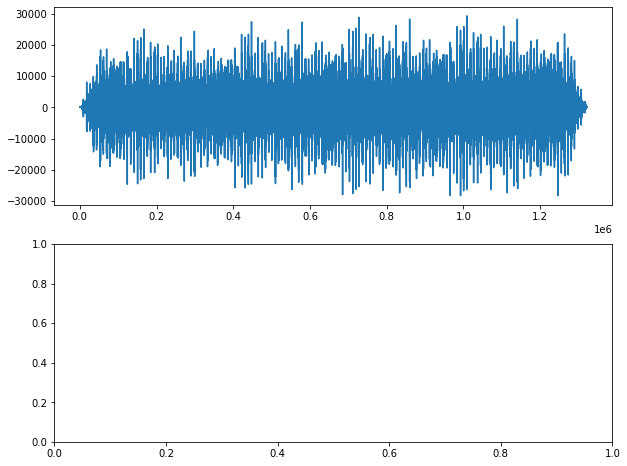

(1326151,) (30040,)


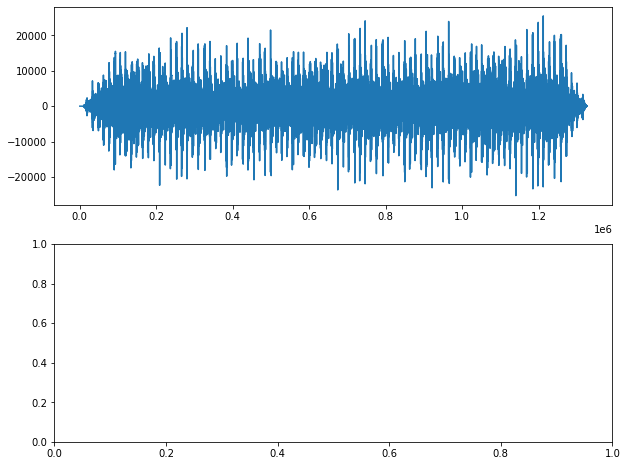

(1321313,) (30040,)


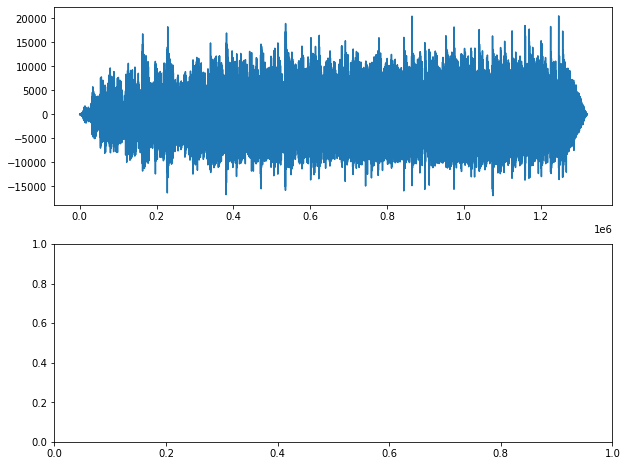

(1327434,) (30040,)


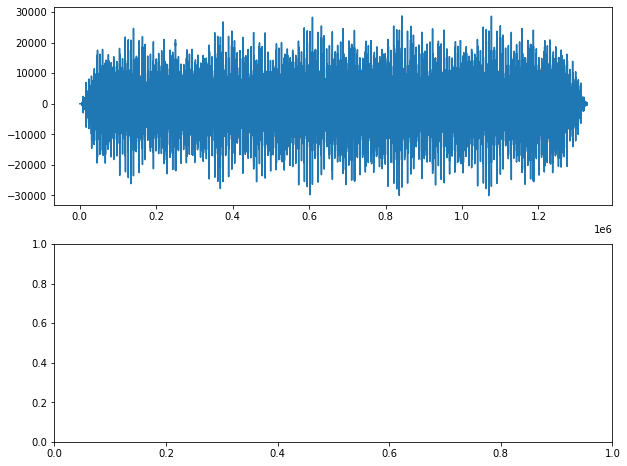

(1326641,) (30040,)


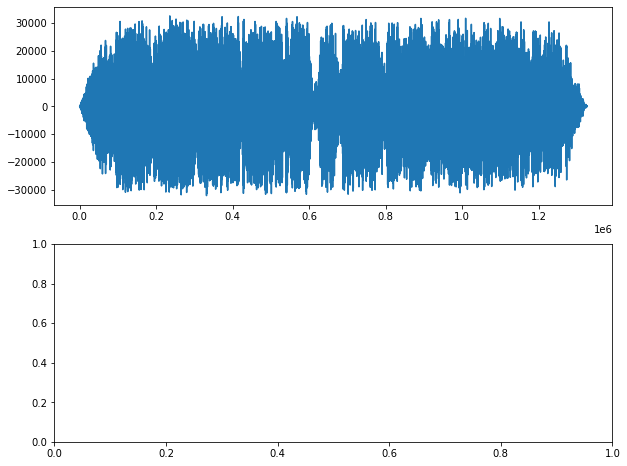

(1321098,) (30040,)


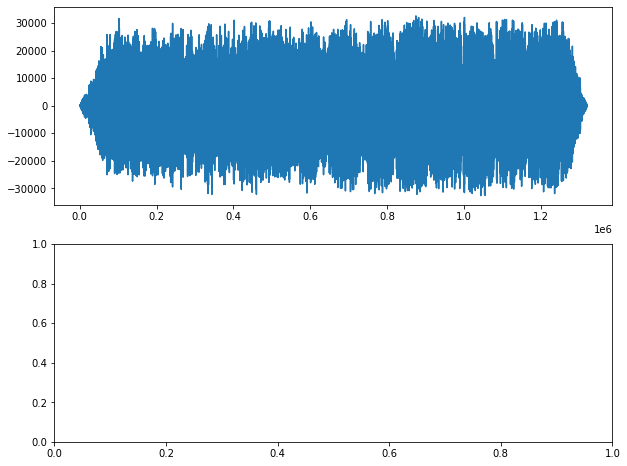

(1325825,) (30040,)


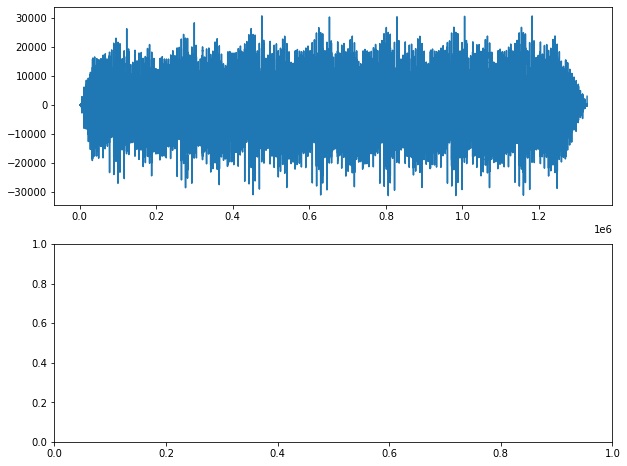

(1332173,) (30040,)


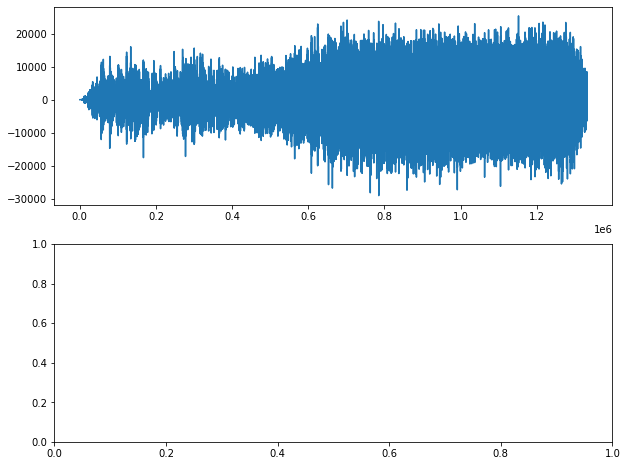

(1343462,) (30040,)


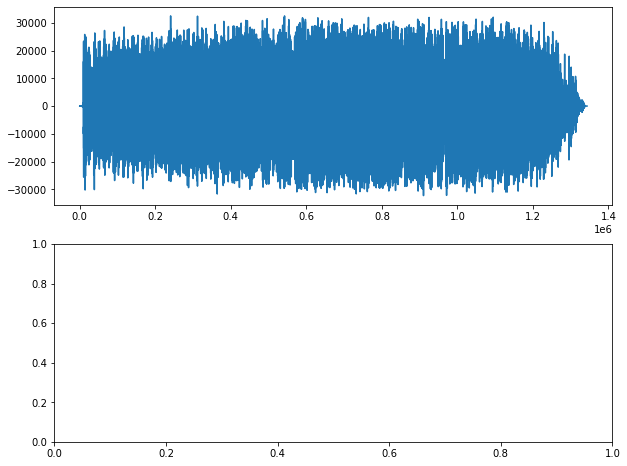

(1327274,) (30040,)


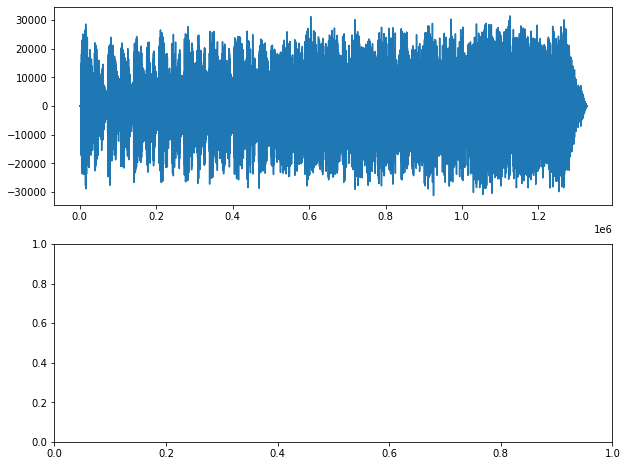

In [74]:
os.chdir("/mnt/sda1/shivam/DrummingEEG/Stimuli")
for stim in stim_files:
    sampling_rate, samples = wavfile.read(stim + ".wav")
    try:
        mono_song = np.mean(samples, axis=1)
    except:
        mono_song = samples
    
    eeg_resp = all_song_eeg[stim]
    print(mono_song.shape, eeg_resp.shape)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
    ax1.plot(mono_song)
    
#     fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8))
#     fss, fse = sampling_rate, 1000
#     Ns, Ne = len(mono_song), len(eeg_resp)
    
#     # FFT of song
#     fs, ts, Sxxs = signal.spectrogram(mono_song, fss)
    
#     # FFT of EEG
#     fe, te, Sxxe = signal.spectrogram(eeg_resp, fse)
    
# #     ax1.pcolormesh(ts, fs, Sxxs, shading='gouraud')
#     ax1.plot(Sxxs[:10, :])
# #     ax1.set_xlabel('Frequency [Hz]')
#     ax1.set_xlabel('Time')
#     ax1.set_title("FFT of song")
    
# #     ax2.pcolormesh(te, fe, Sxxe, shading='gouraud')
#     ax2.plot(Sxxe)
# #     ax2.set_xlabel('Frequency [Hz]')
#     ax2.set_xlabel('Time')
#     ax2.set_title("FFT of EEG Response")
    
    plt.show()

In [47]:
fe.shape, te.shape, Sxxe.shape

((129,), (133,), (129, 133))